In [1]:
import pandas as pd
from math import *
import numpy as np
import os
import matplotlib
# matplotlib.use('GTKAgg')
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation
import cv2
import time
# from time import *

from vpython import *
# import ahrs

import statistics as sts



%matplotlib inline

<IPython.core.display.Javascript object>

In [2]:
folder_path = os.getcwd()
files= ['ball_IMU_tabela_final_fdt6_cropped.csv', 'ball_IMU_tabela_final_fdt9.csv']
selected_file = 1
file_path = os.path.join(folder_path, 'files', files[selected_file])
ball_IMU = pd.read_csv(file_path)

ball_IMU.head()

,elapsed_time,ax,ay,az,gx,gy,gz,mx,my,mz
0,0.000,0.686523,-0.588013,0.306885,-5.065918,-8.850098,-15.014648,-15.539551,20.117188,0.231934
1,0.001,0.692871,-0.591797,0.329834,-5.065918,-8.850098,-15.014648,-15.539551,20.117188,0.231934
2,0.001,0.701172,-0.589600,0.360840,-5.065918,-8.850098,-15.014648,-15.539551,20.117188,0.231934
3,0.024,0.708374,-0.594727,0.373657,-5.065918,-8.850098,-15.014648,-15.539551,20.117188,0.231934
4,0.025,0.715454,-0.590820,0.351074,-5.065918,-8.850098,-15.014648,-15.539551,20.117188,0.231934


In [145]:
ball_IMU.columns

Index(['elapsed_time', 'ax', 'ay', 'az', 'gx', 'gy', 'gz', 'mx', 'my', 'mz'], dtype='object')

# Sensor data investigation

In [3]:
# https://towardsdatascience.com/video-streaming-in-the-jupyter-notebook-635bc5809e85
from ipywidgets import IntSlider
from ipywidgets import Video, Image
min_sec = IntSlider(min=0, max=max(ball_IMU['elapsed_time']))
max_sec = IntSlider(min=0, max=max(ball_IMU['elapsed_time']), value=max(ball_IMU['elapsed_time']))

In [4]:
video_files= ['20210128_175424.mp4', '20210128_180412.mp4', '20210128_181219.mp4', 'tabela_final_fdt6_cropped.mp4']
selected_file = 2
video_path = os.path.join(folder_path, 'Videos', video_files[selected_file])

In [5]:
# video = Video.from_file(video_path)
# video

In [6]:
# cap = cv2.VideoCapture(video_path)
# frames =[]

In [7]:
min_sec.value = 80
min_sec

IntSlider(value=80, max=170)

In [8]:
max_sec.value = 150
max_sec

IntSlider(value=150, max=170)

In [9]:
l_second = min_sec.value # in seconds
u_second = max_sec.value # in seconds

l_bound = ball_IMU.iloc[(ball_IMU['elapsed_time']-l_second).abs().argsort()[:1]].index.values[0]
u_bound = ball_IMU.iloc[(ball_IMU['elapsed_time']-u_second).abs().argsort()[:1]].index.values[0]

# rows = u_bound-l_bound+1
rows = len(ball_IMU)
print(f'Showing data from item {l_bound} to {u_bound} | {rows} rows: [{l_bound}:{u_bound}]')

Showing data from item 4487 to 8153 | 9062 rows: [4487:8153]


## Sensors aligned graph

recording data from row 4487 to row 8153
sample rate accel: 2.2236770321876707 Hz


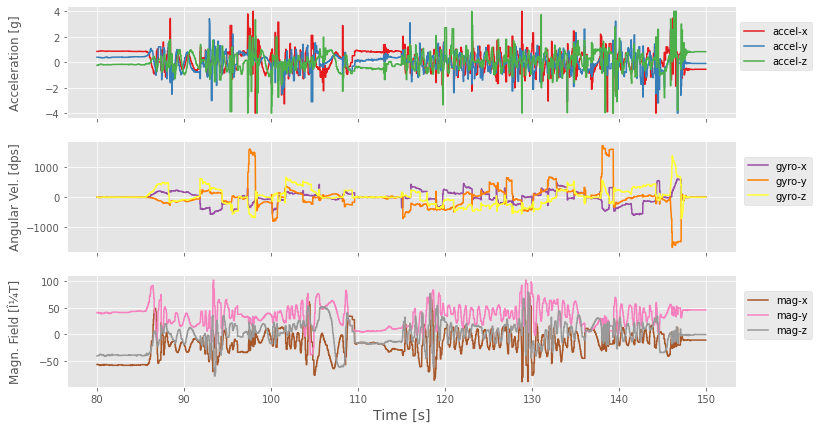

In [10]:
plt.style.use('ggplot') # matplotlib visual style setting

ii = len(ball_IMU['elapsed_time']) # number of points
ii = u_bound
t1 = l_bound # for calculating sample rate

# prepping for visualization
mpu6050_str = ['accel-x','accel-y','accel-z','gyro-x','gyro-y','gyro-z']
AK8963_str = ['mag-x','mag-y','mag-z']
mpu6050_vec,AK8963_vec,t_vec = [],[],[]

print(f'recording data from row {l_bound} to row {u_bound}')
for ii in range(l_bound,ii):
    
    try:
        ax,ay,az,wx,wy,wz = ball_IMU['ax'][ii], ball_IMU['ay'][ii], ball_IMU['az'][ii], ball_IMU['gx'][ii], ball_IMU['gy'][ii], ball_IMU['gz'][ii]
        mx,my,mz = ball_IMU['mx'][ii], ball_IMU['my'][ii], ball_IMU['mz'][ii]
    except:
        continue
    t_vec.append(ball_IMU['elapsed_time'][ii]) # capture timestamp
    AK8963_vec.append([mx,my,mz])
    mpu6050_vec.append([ax,ay,az,wx,wy,wz])
    
print('sample rate accel: {} Hz'.format(ii/((time.time()*0+u_bound)-t1))) # print the sample rate
# t_vec = np.subtract(t_vec,t_vec[0])
# print(f'time {t_vec}')

# plot the resulting data in 3-subplots, with each data axis
fig,axs = plt.subplots(3,1,figsize=(12,7),sharex=True)
cmap = plt.cm.Set1

ax = axs[0] # plot accelerometer data
for zz in range(0,np.shape(mpu6050_vec)[1]-3):
    data_vec = [ii[zz] for ii in mpu6050_vec]
    ax.plot(t_vec,data_vec,label=mpu6050_str[zz],color=cmap(zz))
ax.legend(bbox_to_anchor=(1.12,0.9))
ax.set_ylabel('Acceleration [g]',fontsize=12)

ax2 = axs[1] # plot gyroscope data
for zz in range(3,np.shape(mpu6050_vec)[1]):
    data_vec = [ii[zz] for ii in mpu6050_vec]
    ax2.plot(t_vec,data_vec,label=mpu6050_str[zz],color=cmap(zz))
ax2.legend(bbox_to_anchor=(1.12,0.9))
ax2.set_ylabel('Angular Vel. [dps]',fontsize=12)

ax3 = axs[2] # plot magnetometer data
for zz in range(0,np.shape(AK8963_vec)[1]):
    data_vec = [ii[zz] for ii in AK8963_vec]
    ax3.plot(t_vec,data_vec,label=AK8963_str[zz],color=cmap(zz+6))
ax3.legend(bbox_to_anchor=(1.12,0.9))
ax3.set_ylabel('Magn. Field [Î¼T]',fontsize=12)
ax3.set_xlabel('Time [s]',fontsize=14)

fig.align_ylabels(axs)
plt.show()

## Magnetometer

In [11]:
data_mag = ball_IMU.loc[:,['elapsed_time', 'mx', 'my','mz']]
data_mag.head()

,elapsed_time,mx,my,mz
0,0.000,-15.539551,20.117188,0.231934
1,0.001,-15.539551,20.117188,0.231934
2,0.001,-15.539551,20.117188,0.231934
3,0.024,-15.539551,20.117188,0.231934
4,0.025,-15.539551,20.117188,0.231934


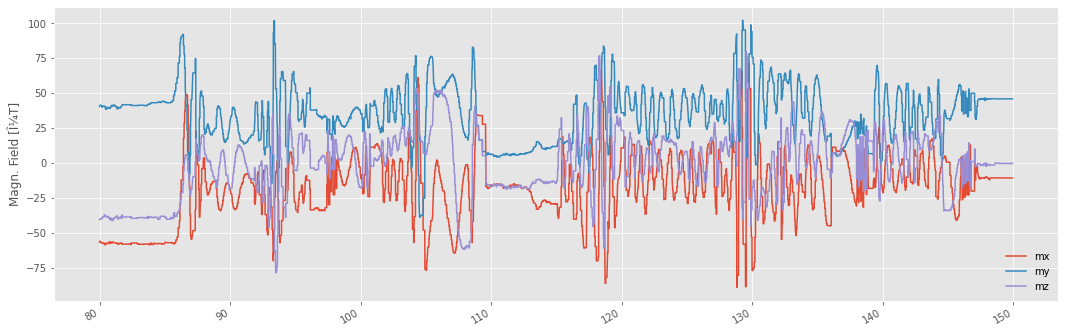

In [12]:
# selected elapsed time
x = data_mag['elapsed_time'][l_bound:u_bound]

fig, ax = plt.subplots()
fig.set_size_inches(18, 6)

# plot x
y = data_mag['mx'][l_bound:u_bound]
ax.plot(x,y, label='mx')


# plot y
y = data_mag['my'][l_bound:u_bound]
ax.plot(x,y, label='my')

# plot z
y = data_mag['mz'][l_bound:u_bound]
ax.plot(x,y, label='mz')

# beautify the x-labels
plt.gcf().autofmt_xdate()
ax.legend(loc='lower right', frameon=False)
ax.set_ylabel('Magn. Field [Î¼T]',fontsize=12)
plt.show()

## Calibration

### offset the median value of each column 

In [13]:
data_mag.describe()

,elapsed_time,mx,my,mz
count,9062.000000,9062.000000,9062.000000,9062.000000
mean,82.934013,-12.696657,37.298847,1.410592
std,47.443811,19.442064,17.434990,17.412530
min,0.000000,-88.940430,-38.867188,-78.454590
25%,42.197250,-20.642090,22.753906,-5.505371
50%,80.797500,-11.059570,39.770508,0.927734
75%,123.374250,3.564453,49.121094,12.203979
max,170.823000,71.301270,102.148438,79.528809


In [14]:
medians = data_mag.median()
medians

elapsed_time    80.797500
mx             -11.059570
my              39.770508
mz               0.927734
dtype: float64

In [15]:
columns=['elapsed_time' ,'mx', 'my', 'mz']
calibrated_mag = np.ndarray(shape=(rows, 4), dtype=float)
calibrated_mag = pd.DataFrame(data=calibrated_mag, columns=columns)

calibrated_mag.loc[:,'elapsed_time']=data_mag.loc[:,'elapsed_time']

for i, col in enumerate(columns):
    print(col, medians[i]*-1, data_mag[col].median())
    if i > 0 :
        calibrated_mag.loc[:, col] = data_mag.loc[:,col] + (medians[i]*-1)
#         calibrated_mag[col] = data_mag[col].shift(medians[i]*-1, axis = 0)
# 
calibrated_mag

elapsed_time -80.7975 80.7975
mx 11.0595703125 -11.0595703125
my -39.7705078125 39.7705078125
mz -0.927734375 0.927734375


,elapsed_time,mx,my,mz
0,0.000,-4.47998,-19.653320,-0.695801
1,0.001,-4.47998,-19.653320,-0.695801
2,0.001,-4.47998,-19.653320,-0.695801
3,0.024,-4.47998,-19.653320,-0.695801
4,0.025,-4.47998,-19.653320,-0.695801
...,...,...,...,...
9057,170.427,0.00000,6.848145,-0.952148
9058,170.554,0.00000,6.848145,-0.952148
9059,170.619,0.00000,6.848145,-0.952148
9060,170.726,0.00000,6.848145,-0.952148


<IPython.core.display.Javascript object>


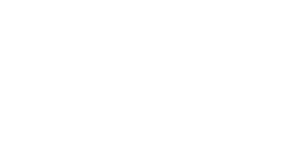

<IPython.core.display.Javascript object>


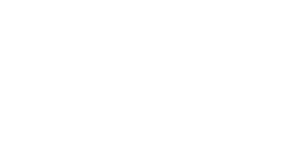

In [16]:
%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
fig.set_size_inches(8, 8)

# plot x
x = data_mag['mx'][l_bound:u_bound]

# plot y
y = data_mag['my'][l_bound:u_bound]

# plot z
z = data_mag['mz'][l_bound:u_bound]

ax.set_xlabel("mx")

ax.set_ylabel("my")

ax.set_zlabel("mz")

ax.scatter3D(x, y, z, c=z, cmap='Greens')

ax.set_title("Magnetometer dispersion")



fig2 = plt.figure()
ay = fig2.add_subplot(111, projection='3d')
fig2.set_size_inches(6, 6)

# plot x
x = calibrated_mag['mx'][l_bound:u_bound]

# plot y
y = calibrated_mag['my'][l_bound:u_bound]

# plot z
z = calibrated_mag['mz'][l_bound:u_bound]

ay.set_xlabel("mx")

ay.set_ylabel("my")

ay.set_zlabel("mz")

ay.scatter3D(x, y, z, c=z, cmap='Greens')

ay.set_title("Calibrated Magnetometer")

# ax.legend(loc='lower right', frameon=False)
ax.view_init(0,0)
ay.view_init(0,0)
ax.set_ylabel('Magn. Field [Î¼T]',fontsize=12)
ay.set_ylabel('Magn. Field [Î¼T]',fontsize=12)

plt.show()

In [17]:
%matplotlib inline

# Accelerometer

In [18]:
data_acc = ball_IMU[['elapsed_time', 'ax', 'ay','az']]
# data_acc.rename(columns={'ax':'x', 'ay':'y', 'az':'z'})
data_acc.head(5)

,elapsed_time,ax,ay,az
0,0.000,0.686523,-0.588013,0.306885
1,0.001,0.692871,-0.591797,0.329834
2,0.001,0.701172,-0.589600,0.360840
3,0.024,0.708374,-0.594727,0.373657
4,0.025,0.715454,-0.590820,0.351074


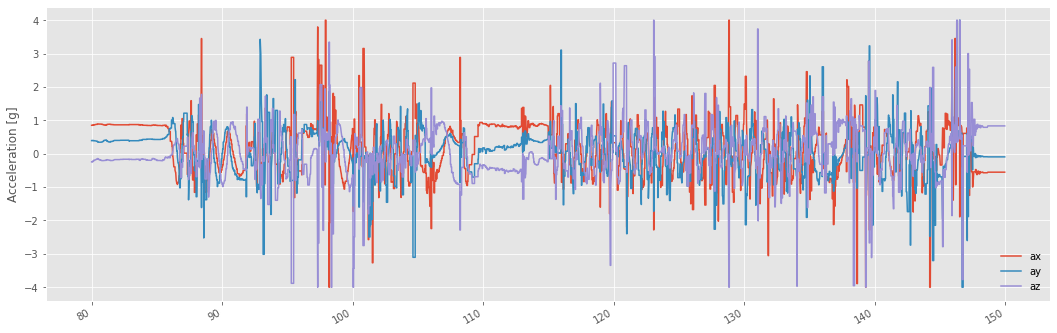

In [19]:
x = data_acc['elapsed_time'][l_bound:u_bound]

fig, ax = plt.subplots()
fig.set_size_inches(18, 6)

# plot x
y = data_acc['ax'][l_bound:u_bound]
ax.plot(x,y, label='ax')

# plot y
y = data_acc['ay'][l_bound:u_bound]
ax.plot(x,y, label='ay')

# plot z
y = data_acc['az'][l_bound:u_bound]
ax.plot(x,y, label='az')

# beautify the x-labels
plt.gcf().autofmt_xdate()
ax.legend(loc='lower right', frameon=False)
ax.set_ylabel('Acceleration [g]',fontsize=12)
plt.show()

### Gravity

https://www.allaboutcircuits.com/technical-articles/how-to-interpret-IMU-sensor-data-dead-reckoning-rotation-matrix-creation/

In [20]:
data_acc.head(1)

,elapsed_time,ax,ay,az
0,0.0,0.686523,-0.588013,0.306885


In [21]:
accel_sum = np.array([data_acc['ax'][i]+data_acc['ay'][i]+data_acc['az'][i] for i in range(rows)])
    
print(f'Average sum of diferences: {round(sts.mean(accel_sum),5)}')
print(f'Standard dev of diferences: {round(sts.stdev(accel_sum),5)}')
print(f'Median diference: {round(sts.median(accel_sum),5)}')
print(f'Max diference: {round(max(accel_sum),5)}')
print(f'Min diference: {round(min(accel_sum),5)}')


Average sum of diferences: 0.0222
Standard dev of diferences: 1.16202
Median diference: 0.17773
Max diference: 11.11157
Min diference: -10.14062


### Normalization

$$ \hat{A} = \Bigg \{ \frac{A_{x}}{\sqrt{A^{2}_{x} + A^{2}_{y} + A^{2}_{z} }}  \hat{x},  \frac{A_{y}}{\sqrt{A^{2}_{x} + A^{2}_{y} + A^{2}_{z} }}  \hat{y},  \frac{A_{z}}{\sqrt{A^{2}_{x} + A^{2}_{y} + A^{2}_{z} }}  \hat{z}    \Bigg\} $$

Normalization gives a vector that has only direction—the length of a normalized vector is one. To normalize, divide each component by the square root of the sum of the squares of each component. An example, made from actual sensor data, is shown below.

In [22]:
A_Base= [0.59, 9.15, -3.47]
gX, gY, gZ = A_Base
ax, ay, az = gX, gY, gZ
x, y, z = [1, 1, 1]
A_example = [ (ax/sqrt(ax**2+ay**2+az**2))*x, (ay/sqrt(ax**2+ay**2+az**2))*y, (az/sqrt(ax**2+ay**2+az**2))*z ]
A_example

[0.060181683726518755, 0.9333261120299096, -0.3539499025949493]

$$ \hat{A} = \Bigg \{ \frac{0.59}{\sqrt{0.59^{2} + 9.15^{2} + (-3.47)^{2}}} \hat{x}, \frac{9.15}{\sqrt{0.59^{2} + 9.15^{2} + (-3.47)^{2}}} \hat{y}, \frac{-3.47}{\sqrt{0.59^{2} + 9.15^{2} + (-3.47)^{2}}} \hat{z}    \Bigg\} $$

$$ \hat{A} = \{ 0.061\hat{x},  0.933\hat{y},  -0.354\hat{z} \} $$
<br>
Since we chose the target vector as being the negative z-axis, we don’t have to go through the trouble of normalizing it.
<br><br>
$$ \hat{G} = \{ 0\hat{x},  0\hat{y},  -1\hat{z} \} $$

In [23]:
G = [0, 0, 1]

### Real data

In [24]:
norm_acc = np.ndarray(shape=(rows,3), dtype=float)
G = [0, 0, 1]
x, y, z = [1, 1, 1]

# norm_acc_b = [[ (ax/sqrt(ax**2+ay**2+az**2))*x, (ay/sqrt(ax**2+ay**2+az**2))*y, (az/sqrt(ax**2+ay**2+az**2))*z ] for t, ax, ay, az in data_acc]

for i in range(rows):
    ax, ay, az = data_acc.iloc[i, 1:]
    norm_acc[i] = [ (ax/sqrt(ax**2+ay**2+az**2))*x, (ay/sqrt(ax**2+ay**2+az**2))*y, (az/sqrt(ax**2+ay**2+az**2))*z ]

norm_acc[0]#, norm_accb[0]

array([ 0.7191777 , -0.61598133,  0.32148164])

## Vector Mathematics
### Dot Product
<br>
To determine the part of vector A that is projected onto vector G, use the dot product.
<br><br><br>
$$ \hat{A} * \hat{G} = |A| |G| cos(\theta) $$
<br><br>
And to find the angle between them, rearrange the equations to solve for $\theta$.
<br><br>
$$ cos(\theta) = \frac{\hat{A} * \hat{G}}{|A| |G|}  $$
<br>
Our vector normalization is already paying off. Since |A| and |G| are both already set to one, the denominator disappears. Additionally, since the X and Y components of G are zero, the equation reduces rapidly.

$$ cos(\theta) = A_{x} * 0 + A_{y}*0 + -1*A_{z}$$


So the angle of rotation depends only on the Z component of the acceleration.


$$ \theta = \arccos(-1*A_{z})$$

In [25]:
import math

In [26]:
theta_example = np.arccos((-1)*A_example[2])
print(f'theta = {round(theta_example,3)} / theta(°) = {round(degrees(theta_example), 3)}')

theta = 1.209 / theta(°) = 69.271


### Real data

In [27]:
theta = np.arccos(G[2]*data_acc.iloc[0, 3])
theta

1.258878205305094

In [28]:
theta = np.arccos(G[2]*norm_acc[0, 2])
print(f'theta = {round(theta,3)} / theta(°) = {round(degrees(theta), 3)}')

theta = 1.244 / theta(°) = 71.247


In [76]:
theta = np.arccos(G[2]*norm_acc[:, 2])

theta = np.array([degrees(theta[i]) for i in range(len(theta))])

# theta_df = pd.DataFrame(theta, columns=['theta'])

# theta_df.describe()

print(f'Average theta: {round(sts.mean(theta),5)}')
print(f'Standard dev theta: {round(sts.stdev(theta),5)}')
print(f'Median theta: {round(sts.median(theta),5)}')
print(f'Max theta: {round(max(theta),5)}')
print(f'Min theta: {round(min(theta),5)}')
theta[:5]

Average theta: 85.8317
Standard dev theta: 36.6162
Median theta: 89.10658
Max theta: 179.27588
Min theta: 2.50145


array([71.24744821, 70.10097235, 68.50152125, 68.00203962, 69.27507984])

### Cross Product

Determining the vector to rotate this angle around is not for the faint of heart. Not that it’s particularly difficult, but it is particularly tedious. There are several steps, and it is easy to make a little mistake. This is where programs such as Mathematica shine—they don’t make mistakes unless their human programmers tell them to. Below is the rotation matrix before I told the program that I was using unit vectors
<br><br>
Once you realize that there are several simplifications that can be made to the matrix, it reduces quickly to something far more manageable

$$ \begin{pmatrix} \frac{ A{y}^{2}-A{x}^{2}A{z} } { A{x}^{2}+A{y}^{2} } & \frac{ -A{x}A{y}-A{x}A{y}A{z} } { A{x}^{2}+A{y}^{2} } & A{x} \\ \frac{ -A{x}A{y}-A{x}A{y}A{z} } { A{x}^{2}+A{y}^{2}} & \frac{ A{x}^{2}-A{y}^{2}A{z} } { A{x}^{2}+A{y}^{2} } & A{y} \\ -A{x} & -A{y} & -A{z} \end{pmatrix} $$

In [30]:
ax, ay, az = A_example

Rotation_Matrix_example = [[ (ay**2-(ax**2)*az)/(ax**2+ay**2), (-ax*ay-ax*ay*az)/(ax**2+ay**2), ax  ],
                   [ (-ax*ay-ax*ay*az)/(ax**2+ay**2), (ax**2-(ay**2)*az)/(ax**2+ay**2), ay  ],
                   [ -ax, -ay, -az  ]
                  ]

Rotation_Matrix_example = np.array(Rotation_Matrix_example)
Rotation_Matrix_example

array([[ 0.99732499, -0.04148539,  0.06018168],
       [-0.04148539,  0.35662492,  0.93332611],
       [-0.06018168, -0.93332611,  0.3539499 ]])

And after the substitution of our original values, we have a rotation matrix that will rotate our gravity vector into the negative z-axis. And there are certain symmetries that can be taken advantage of to further reduce computational complexity.
<br><br>
$$ \begin{pmatrix} 0.99725 & -0.042056 & 0.061 \\ -0.042056 & 0.35675 & 0.933 \\ -0.061 & -0.933 & 0.354 \end{pmatrix} $$
<br><br>
This matrix, based on the gravity vector, is determined once at start-up to get an orientation with respect to gravity. If applied to future acceleration readings, this matrix will rotate the values so that no matter how your sensor is mounted, the negative z-axis will point straight down. This rotation matrix, when multiplied by any acceleration vector (normalized or not), will rotate it. Let’s look at an example—and use the original gravity vector.

In [31]:
print(Rotation_Matrix_example, A_Base)

vector_example = np.matmul(Rotation_Matrix_example, A_Base)
vector_example

[[ 0.99732499 -0.04148539  0.06018168]
 [-0.04148539  0.35662492  0.93332611]
 [-0.06018168 -0.93332611  0.3539499 ]] [0.59, 9.15, -3.47]


array([-8.32667268e-17, -8.88178420e-16, -9.80364728e+00])

$$ (-0.008\hat{x},-0.002\hat{x},-9.801\hat{z}) $$
<br>
Not exactly zero in the X direction and the Y direction—but close enough. Remember that we used only two decimal places of precision when starting this journey, and we have a zero reading out to two decimal places in X and Y as well as the expected -9.801 m/s². I’ll call that a win.

### Real data

In [32]:
ax, ay, az =norm_acc[0]

Rotation_Matrix = [[ (ay**2-ax**2*az)/(ax**2+ay**2), (-ax*ay-ax*ay*az)/(ax**2+ay**2), ax  ],
                   [ (-ax*ay-ax*ay*az)/(ax**2+ay**2), (ax**2-ay**2*az)/(ax**2+ay**2), ay  ],
                   [ -ax, -ay, -az  ]
                  ]

Rotation_Matrix = np.array(Rotation_Matrix)
Rotation_Matrix

array([[ 0.23772651,  0.65289321,  0.7191777 ],
       [ 0.65289321,  0.44079186, -0.61598133],
       [-0.7191777 ,  0.61598133, -0.32148164]])

In [33]:
oldVector = data_acc.iloc[0, 1:]
normalized_vector = norm_acc[0]
print(Rotation_Matrix, [oldVector])

g_vector = np.matmul(Rotation_Matrix, oldVector)
g_vector

[[ 0.23772651  0.65289321  0.7191777 ]
 [ 0.65289321  0.44079186 -0.61598133]
 [-0.7191777   0.61598133 -0.32148164]] [ax    0.686523
ay   -0.588013
az    0.306885
Name: 0, dtype: float64]


array([-5.55111512e-17,  2.77555756e-17, -9.54595003e-01])

In [34]:
g_vectors = np.ndarray(shape=(rows,3), dtype=float)

for i in range(rows):
    g_vector = [data_acc.loc[i, 'ax'], data_acc.loc[i, 'ay'], data_acc.loc[i, 'az']]
    g_vectors[i] =  np.matmul(Rotation_Matrix, g_vector)*-1
    
g_vectors

array([[ 5.55111512e-17, -2.77555756e-17,  9.54595003e-01],
       [-1.55429072e-02,  1.16599841e-02,  9.68868832e-01],
       [-4.12495254e-02,  2.43709539e-02,  9.83452909e-01],
       ...,
       [-4.02799517e-01,  9.06761788e-01, -8.83675329e-02],
       [-4.02799517e-01,  9.06761788e-01, -8.83675329e-02],
       [-4.02799517e-01,  9.06761788e-01, -8.83675329e-02]])

# Vizualization of gravity

In [35]:
%matplotlib notebook

from vpython import *

In [36]:
run = False

In [37]:
if run:
    scene.range = 5
#     scene.forward = vector(.5, -1, -1)
    scene.background = color.gray(.2)
    arrowL = 4
    arrowT = .05
    ball_r = 3
    point_ball_r = ball_r/30

    show_path = False

    logo=box(length=2, width=.2, heght=.2, pos=vector(0, ball_r+.1, 0), color=color.black)
    mySphere = sphere(radius=ball_r, color=vector(1,1,0), opacity=.5)
    ball = compound([logo, mySphere])
    
    gArrow = arrow(axis=vector(0, 0, -1), color=vector(1, 1, 1), length=arrowL, shaftwidth=arrowT)

#     frontArrow = arrow(axis=vector(1, 0, 0), color=vector(1, 0, 0), length=arrowL*2, shaftwidth=arrowT)
    upArrow = arrow(axis=vector(0, 1, 0), color=vector(0, 1, 0), length=arrowL*1.2, shaftwidth=arrowT)
#     sideArrow = arrow(axis=vector(0, 0, 1), color=vector(0, 0, 1), length=arrowL*1.2, shaftwidth=arrowT)


    counter = label(text='Elapsed Time: '+str(0), pos=vector(5, 5, 0), color=color.white, opacity=.8)
    values = label(text='Gravity Vector: Gx=0, Gy=0, Gz=0', pos=vector(8, 8, 8), color=color.white, opacity=.8)
 
    arduino_board = box(length=2, width=.2, heght=.1, opacity=.8, pos=vector(0, 0, 0))
    chip = box(length=.5, width=.05, heght=.05, pos=vector(-.5, .1+.05, 0), color=color.blue)
    arduino = compound([arduino_board, chip])



    for i in range(rows):
        rate(50)
        gx, gy, gz = g_vectors[i]
        
        counter.text = f"Elapsed Time: {data_acc['elapsed_time'][i]}"
        values.text =f'Gravity Vector: Gx={round(gx,1)}, Gy={round(gy,1)}, Gz={round(gz,1)}'
        
        y = vector(0, 1, 0)    
        g =  vector(0, 0, 1)
        v = vector(gx, gy, gz)
        s = cross(v, y)
        
        
        upArrow.axis = v
        gArrow.axis = g
        arduino.axis = s
        arduino.up = v
        ball.up = v
        ball.axis = s
        
#         frontArrow.length = arrowL * 2
        upArrow.length = arrowL * 1.6


In [38]:
%matplotlib inline

### Aligning the X and Y axis 
<br>
Fortunately, rotating the compass reading so that the x- or y-axis lies along magnetic north is much simpler, as the measurement values can now be rotated around the z-axis. And there is plenty of room for code simplification—temporary variables can be used to store common terms to accelerate code execution. Additionally, symmetry can be used to reduce redundant calculation.

Substituting the value of tangent of θ=Y/X into the matrix provides the rotation. You can align to the positive x-axis, the positive y-axis, the negative y-axis, or the negative x-axis by manipulating the right side of this equation (e.g., tan[θ] = -X/Y), or you can align to another angle (e.g., geographic north) by manipulating the left side of the equation (tan[θ+14°]=Y/X).

$$ \begin{pmatrix} \cos{[\theta]} & -\sin{[\theta]} & 0 \\ \sin{[\theta]} & \cos{[\theta]} & 0 \\ 0 & 0 & 1 \end{pmatrix} \rightarrow \tan{[\theta]} = \frac{y}{x} \rightarrow \begin{pmatrix} \frac{ 1 } { \sqrt{1+\frac{A^{2}_{y}}{A^{2}_{x} }}} & -\frac{ A_{y} } { A_{x}\sqrt{1+\frac{A^{2}_{y}}{A^{2}_{x} }}} & 0 \\ \frac{ A_{y} } { A_{x}\sqrt{1+\frac{A^{2}_{y}}{A^{2}_{x} }}} & \frac{ 1 } { \sqrt{1+\frac{A^{2}_{y}}{A^{2}_{x} }}}& 0 \\ 0 & 0 & 1 \end{pmatrix} $$
<br>
$$ \begin{pmatrix} 0.886767 & -0.462216 & 0 \\ -0.462216 & 0.886767 & 0 \\ 0 & 0 & 1 \end{pmatrix} $$
<br>

In [39]:
xy_vector = A_Base
tan_theta_example = [[cos(theta_example), -sin(theta_example), 0],
                     [sin(theta_example), cos(theta_example), 0],              
                    [0, 0, 1]
                    ]
# tan_theta_example = np.matmul(tan_theta_example,xy_vector )
tan_theta_example

[[0.3539499025949493, -0.9352643831842555, 0],
 [0.9352643831842555, 0.3539499025949493, 0],
 [0, 0, 1]]

In [40]:
print(A_Base)
ax, ay, az = A_Base
print(ax, ay, az)


tan_theta_example = [[1/(sqrt(1+(ay**2/ax**2)))   ,  -(ay/(ax*sqrt(1+(ay**2/ax**2)))), 0],
                    [ay/(ax*sqrt(1+(ay**2/ax**2))), 1/(sqrt(1+(ay**2/ax**2)))        , 0],
                    [0                            ,                                 0, 1]
            ]
tan_theta_example

[0.59, 9.15, -3.47]
0.59 9.15 -3.47


[[0.06434724213662525, -0.9979275687290188, 0],
 [0.9979275687290188, 0.06434724213662525, 0],
 [0, 0, 1]]

In [41]:
print(A_example)
ax, ay, az = A_example
print(ax, ay, az)
tan_theta_example = [[1/(sqrt(1+(ay**2/ax**2)))   ,  -(ay/(ax*sqrt(1+(ay**2/ax**2)))), 0],
                    [ay/(ax*sqrt(1+(ay**2/ax**2))), 1/(sqrt(1+(ay**2/ax**2)))        , 0],
                    [0                            ,                                 0, 1]
                    ]
tan_theta_example

[0.060181683726518755, 0.9333261120299096, -0.3539499025949493]
0.060181683726518755 0.9333261120299096 -0.3539499025949493


[[0.06434724213662525, -0.9979275687290188, 0],
 [0.9979275687290188, 0.06434724213662525, 0],
 [0, 0, 1]]

In [42]:
finalRotation_Matrix_Example = np.matmul(Rotation_Matrix_example, tan_theta_example)
finalRotation_Matrix_Example

array([[ 2.27757001e-02, -9.97927569e-01,  6.01816837e-02],
       [ 3.53216366e-01,  6.43472421e-02,  9.33326112e-01],
       [-9.35264383e-01, -3.18402292e-18,  3.53949903e-01]])

## Summary
IMUs need to be calibrated in the environment in which they will operate. Part of that calibration usually requires the user to define how the sensor is oriented in space and in reference to the environment the sensor is in. This article demonstrated how to create an arbitrary rotation matrix aligned with accelerometer data as well as a two-dimensional rotation matrix based on magnetometer data.
<br><br>
$$ \begin{pmatrix} 0.86489 & -0.498239 & 0.061 \\ 0.127602 & 0.335793 & 0.933 \\ -0.48534 & -0.799159 & 0.354 \end{pmatrix} $$
<br>
The combined gravity and magnetometer rotation matrix transform is shown above.

The initial matrices (gravity and magnetometer) can be multiplied to create a single rotation matrix that is applied to all future measurements—ensuring that the data you collect can be successfully analyzed later.

In [43]:
correct_value = [[0.86489, -0.498239, 0.061],
                 [0.127602, 0.335793, 0.933],
                 [-0.48534, -0.799159, 0.354]
                ]
correct_value

[[0.86489, -0.498239, 0.061],
 [0.127602, 0.335793, 0.933],
 [-0.48534, -0.799159, 0.354]]

### Real data

In [44]:
ax, ay, az = norm_acc[0]


tan_theta = [[1/(sqrt(1+(ay**2/ax**2)))   ,  -(ay/(ax*sqrt(1+(ay**2/ax**2)))), 0],
            [ay/(ax*sqrt(1+(ay**2/ax**2))), 1/(sqrt(1+(ay**2/ax**2)))        , 0],
            [0                            ,                                 0, 1]
            ]

tan_theta

[[0.7594948667246738, 0.6505132953436618, 0],
 [-0.6505132953436618, 0.7594948667246738, 0],
 [0, 0, 1]]

In [45]:
finalRotation_Matrix = np.matmul(Rotation_Matrix, tan_theta)
finalRotation_Matrix

array([[-2.44163654e-01,  6.50513295e-01,  7.19177699e-01],
       [ 2.09128080e-01,  7.59494867e-01, -6.15981326e-01],
       [-9.46915813e-01,  8.14611594e-18, -3.21481639e-01]])

In [46]:

# finalRotation_Matrix = np.ndarray(shape=(rows,3), dtype=float)
finalRotation_Matrix = []
for i in range(rows):
    
    ax, ay, az = norm_acc[i]
    tan_theta = [[1/(sqrt(1+(ay**2/ax**2)))   ,  -(ay/(ax*sqrt(1+(ay**2/ax**2)))), 0],
                [ay/(ax*sqrt(1+(ay**2/ax**2))), 1/(sqrt(1+(ay**2/ax**2)))        , 0],
                [0                            ,                                 0, 1]
                ]
    
    finalRotation_Matrix.append(np.matmul(Rotation_Matrix, tan_theta))
print(Rotation_Matrix)
print(tan_theta)   
finalRotation_Matrix[0]

[[ 0.23772651  0.65289321  0.7191777 ]
 [ 0.65289321  0.44079186 -0.61598133]
 [-0.7191777   0.61598133 -0.32148164]]
[[0.9893719186912238, -0.14540703733054616, 0], [0.14540703733054616, 0.9893719186912238, 0], [0, 0, 1]]


array([[-2.44163654e-01,  6.50513295e-01,  7.19177699e-01],
       [ 2.09128080e-01,  7.59494867e-01, -6.15981326e-01],
       [-9.46915813e-01,  8.14611594e-18, -3.21481639e-01]])

In [47]:
# for i in range(rows):
#     vector = [data_acc.loc[i, 'ax'], data_acc.loc[i, 'ay'], data_acc.loc[i, 'az']]
#     new_vectors[i] =  np.matmul(finalRotation_Matrix[i], vector)
    
# new_vectors

In [48]:
for i in range(rows):
    gx, gy, gz = g_vectors[i]
    finalRotation_Matrix[i][0][2] = gx 
    finalRotation_Matrix[i][1][2] = gy
    finalRotation_Matrix[i][2][2] = gz
    
print(finalRotation_Matrix[0], g_vectors[0])

[[-2.44163654e-01  6.50513295e-01  5.55111512e-17]
 [ 2.09128080e-01  7.59494867e-01 -2.77555756e-17]
 [-9.46915813e-01  8.14611594e-18  9.54595003e-01]] [ 5.55111512e-17 -2.77555756e-17  9.54595003e-01]


## Offsetting gravity

basically offset the g-vector from the raw accel

In [49]:
g_vectors

array([[ 5.55111512e-17, -2.77555756e-17,  9.54595003e-01],
       [-1.55429072e-02,  1.16599841e-02,  9.68868832e-01],
       [-4.12495254e-02,  2.43709539e-02,  9.83452909e-01],
       ...,
       [-4.02799517e-01,  9.06761788e-01, -8.83675329e-02],
       [-4.02799517e-01,  9.06761788e-01, -8.83675329e-02],
       [-4.02799517e-01,  9.06761788e-01, -8.83675329e-02]])

In [50]:
g_vectors_t = np.transpose(g_vectors)
g_vectors_t.shape

(3, 9062)

In [51]:
i = 1
ngx = data_acc.loc[i, 'ax'] + g_vectors_t[0, i]*-1
ngy = data_acc.loc[i, 'ay'] + g_vectors_t[1, i]*-1
ngz = data_acc.loc[i, 'az'] + g_vectors_t[2, i]*-1

ngx, ngy, ngz

(0.708414000989062, -0.6034568590997177, -0.639034847752511)

In [53]:
x = data_acc.loc[:, 'ax'].values
x.shape
g_vectors_t[1].shape, data_acc['ax'].values.shape

((9062,), (9062,))

In [54]:
columns = ['ax', 'ay', 'az']
no_gravity_acc = np.ndarray(shape=(3, rows), dtype=float)

no_gravity_acc = [data_acc[col].values + g_vectors_t[i]*-1 if i > 0 else data_acc[col].values for i, col in enumerate(columns)]

no_gravity_acc = np.transpose(no_gravity_acc)

no_gravity_acc[:10], data_acc[:10]

(array([[ 0.68652344, -0.5880127 , -0.64771024],
        [ 0.69287109, -0.60345686, -0.63903485],
        [ 0.70117188, -0.61397056, -0.62261307],
        [ 0.70837402, -0.62455047, -0.62225397],
        [ 0.7154541 , -0.60038913, -0.64026261],
        [ 0.72229004, -0.59410982, -0.6399184 ],
        [ 0.72497559, -0.59485064, -0.64717017],
        [ 0.72021484, -0.57844671, -0.64184287],
        [ 0.71936035, -0.56918862, -0.64209058],
        [ 0.71875   , -0.55336835, -0.65817236]]),
    elapsed_time        ax        ay        az
 0         0.000  0.686523 -0.588013  0.306885
 1         0.001  0.692871 -0.591797  0.329834
 2         0.001  0.701172 -0.589600  0.360840
 3         0.024  0.708374 -0.594727  0.373657
 4         0.025  0.715454 -0.590820  0.351074
 5         0.025  0.722290 -0.587524  0.355835
 6         0.069  0.724976 -0.591187  0.351318
 7         0.070  0.720215 -0.580566  0.344482
 8         0.071  0.719360 -0.576050  0.339111
 9         0.114  0.718750 -0.575439  

### Inverted rotation matrix to find A north, A east and A down (?) 

In [55]:
Inverted_Rotation_Matrix = np.linalg.inv(Rotation_Matrix)
print(Rotation_Matrix)
print(Inverted_Rotation_Matrix)

[[ 0.23772651  0.65289321  0.7191777 ]
 [ 0.65289321  0.44079186 -0.61598133]
 [-0.7191777   0.61598133 -0.32148164]]
[[ 0.23772651  0.65289321 -0.7191777 ]
 [ 0.65289321  0.44079186  0.61598133]
 [ 0.7191777  -0.61598133 -0.32148164]]


In [56]:
ax0, ay0, a0 = data_acc.iloc[0,1:]
ax, ay, az = norm_acc[0]

an, ae, ad = np.matmul(Inverted_Rotation_Matrix, norm_acc[0])

print(ax0, ay0, a0)
print(ax, ay, az)
print(an, ae, ad)

0.6865234375 -0.5880126953125 0.306884765625
0.7191776988705728 -0.6159813256507022 0.3214816385065114
-0.4624048500205084 0.3960533717192014 0.7932991122063374


In [57]:
an, ae, ad = np.matmul(Inverted_Rotation_Matrix, no_gravity_acc[0])
print(ax0, ay0, a0)
print(ax, ay, az)
print(an, ae, ad)

0.6865234375 -0.5880126953125 0.306884765625
0.7191776988705728 -0.6159813256507022 0.3214816385065114
0.24511407837875496 -0.20994212580911498 1.0641641338991898


## Integral velocity

https://www.w3.org/TR/motion-sensors/#absolute-orientation-sensor

3. Low-level Sensors<br>
    3.1. Accelerometer

https://phys.libretexts.org/Bookshelves/University_Physics/Book%3A_University_Physics_(OpenStax)/Book%3A_University_Physics_I_-_Mechanics_Sound_Oscillations_and_Waves_(OpenStax)/03%3A_Motion_Along_a_Straight_Line/3.08%3A_Finding_Velocity_and_Displacement_from_Acceleration

In [58]:
# example https://docs.scipy.org/doc/scipy/reference/tutorial/integrate.html

from scipy.integrate import quad
def integrand(x, a, b):
    return a*x**2 + b

a = 2
b = 1
I = quad(integrand, 0, 1, args=(a,b))
I

(1.6666666666666667, 1.8503717077085944e-14)

In [59]:
absolute_acceleration = np.array([sqrt(ax**2+ay**2+az**2) for ax, ay, az in no_gravity_acc])
print(f'Absolute acceleration: {absolute_acceleration[:5]}, Shape: {absolute_acceleration.shape}')

delta_t = np.array([t-data_acc['elapsed_time'][i-1] for i, t in enumerate(data_acc['elapsed_time']) if i > 0])
delta_t = np.insert(delta_t, 0, 0, axis=0)
print(f'Delta T: {delta_t[:5]}, Shape: {delta_t.shape}')

Absolute acceleration: [1.11202604 1.11919438 1.12082509 1.13095404 1.1323771 ], Shape: (9062,)
Delta T: [0.    0.001 0.    0.023 0.001], Shape: (9062,)


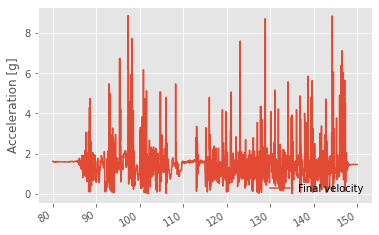

In [60]:
%matplotlib inline
x = data_acc['elapsed_time'][l_bound:u_bound]

fig, ax = plt.subplots()

# plot Final velocity
y = absolute_acceleration[l_bound:u_bound]
ax.plot(x,y, label='Final velocity')


# beautify the x-labels
plt.gcf().autofmt_xdate()
ax.legend(loc='lower right', frameon=False)
ax.set_ylabel('Acceleration [g]',fontsize=12)
plt.show()

In [61]:
def velocity(x, a, t):
    return a*t
i = 3
a = absolute_acceleration[i]
t = delta_t[i]
I = quad(velocity, 0, 1, args=(a, t))
I

(0.0260119429837586, 2.887905801580559e-16)

In [62]:
integralVelocity = np.zeros(rows).astype(float)

integralVelocity = np.array([quad(velocity, 0, 1, args=(absolute_acceleration[i], delta_t[i])) for i in range(rows)])

        
print(f'Integral velocity : {integralVelocity[:5, 0]}, Shape: {integralVelocity.shape}')

Integral velocity : [0.         0.00111919 0.         0.02601194 0.00113238], Shape: (9062, 2)


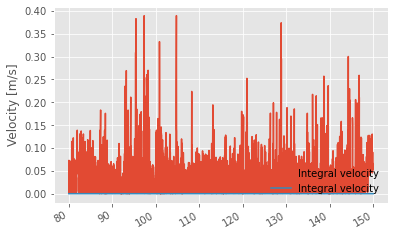

In [63]:
%matplotlib inline
x = data_acc['elapsed_time'][l_bound:u_bound]

fig, ax = plt.subplots()

# plot Final velocity
y = integralVelocity[l_bound:u_bound]
ax.plot(x,y, label='Integral velocity')


# beautify the x-labels
plt.gcf().autofmt_xdate()
ax.legend(loc='lower right', frameon=False)
ax.set_ylabel('Velocity [m/s]',fontsize=12)
plt.show()

In [64]:
finalVelocity = np.zeros(rows).astype(float)

finalVelocity = np.array([finalVelocity[t-1] + absolute_acceleration[t] * delta_t[t] for t in range(rows) if t > 0])
finalVelocity = np.insert(finalVelocity, 0, 0, axis=0)
        
print(f'Final velocity : {finalVelocity[:5]}, Shape: {finalVelocity.shape}')



Final velocity : [0.         0.00111919 0.         0.02601194 0.00113238], Shape: (9062,)


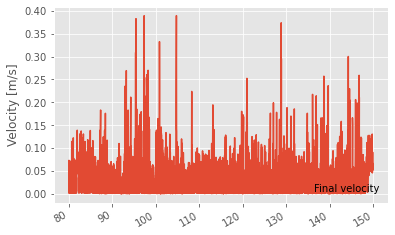

In [65]:
%matplotlib inline
x = data_acc['elapsed_time'][l_bound:u_bound]

fig, ax = plt.subplots()

# plot Final velocity
y = finalVelocity[l_bound:u_bound]
ax.plot(x,y, label='Final velocity')


# beautify the x-labels
plt.gcf().autofmt_xdate()
ax.legend(loc='lower right', frameon=False)
ax.set_ylabel('Velocity [m/s]',fontsize=12)
plt.show()

## Low-pass filter

In [66]:
low_pass_slider = IntSlider(min=0, max=100)
low_pass_slider.value = 90
print('Select bias:')
low_pass_slider

Select bias:


IntSlider(value=90)

In [67]:
class LowPassFilterData:
    def __init__(self, reading, bias):
        self.x = reading[0]
        self.y = reading[1]
        self.z = reading[2]
        self.bias = bias

    def update(self, reading):
        self.x = self.x * self.bias + reading[0] * (1 - self.bias);
        self.y = self.y * self.bias + reading[1] * (1 - self.bias);
        self.z = self.z * self.bias + reading[2] * (1 - self.bias);


accl = data_acc.iloc[0, 1:]
selected_bias =  low_pass_slider.value/100             
# Isolate gravity with low-pass filter.
filter = LowPassFilterData(accl, selected_bias);
print(filter.x, filter.y, filter.z, filter.bias)
low_pass_accel = np.ndarray(shape=(rows,3), dtype=float)
print(accl)
for i in range(rows):
    
    accl = np.array(data_acc.iloc[i, 1:])
#     print((accl))
    filter.update(accl); # Pass latest values through filter.
#     print(f'Isolated gravity (${filter.x}, ${filter.y}, ${filter.z})')
    low_pass_accel[i] = [filter.x, filter.y, filter.z]

# print(low_pass_accel, data_acc.iloc[:, 1:])
# low_pass_accel = pd.DataFrame(data=low_pass_accel, columns=['elapsed_time', 'ax', 'ay', 'az'])
low_pass_accel

0.6865234375 -0.5880126953125 0.306884765625 0.9
ax    0.686523
ay   -0.588013
az    0.306885
Name: 0, dtype: float64


array([[ 0.68652344, -0.5880127 ,  0.30688477],
       [ 0.6871582 , -0.58839111,  0.30917969],
       [ 0.68855957, -0.58851196,  0.3143457 ],
       ...,
       [-0.55981445, -0.08227539,  0.81982422],
       [-0.55981445, -0.08227539,  0.81982422],
       [-0.55981445, -0.08227539,  0.81982422]])

In [73]:
low_pass_norm_accel = np.ndarray(shape=(rows,3), dtype=float)
G = [0, 0, 1]
x, y, z = [1, 1, 1]
# low_pass_norm_accel = np.ndarray([[ (ax/sqrt(ax**2+ay**2+az**2))*x, (ay/sqrt(ax**2+ay**2+az**2))*y, (az/sqrt(ax**2+ay**2+az**2))*z ] for ax, ay, az in low_pass_norm_accel])
for ax, ay, az in low_pass_accel:
     low_pass_norm_accel[i] = [ (ax/sqrt(ax**2+ay**2+az**2))*x, (ay/sqrt(ax**2+ay**2+az**2))*y, (az/sqrt(ax**2+ay**2+az**2))*z ]

low_pass_norm_accel[:5]

array([[1.19994303e-311, 1.19917068e-311, 2.12199579e-314],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000]])

In [74]:
theta_low_pass_accel = np.array(np.arccos(G[2]*low_pass_norm_accel[:, 2]))
print(theta_low_pass_accel[:2])

theta_low_pass_accel = np.array([degrees(theta_low_pass_accel[i]) for i in range(rows)])

print(f'Shape theta: {theta_low_pass_accel.shape}')
print(f'Average theta: {round(sts.mean(theta_low_pass_accel),5)}')
print(f'Standard dev theta: {round(sts.stdev(theta_low_pass_accel),5)}')
print(f'Median theta: {round(sts.median(theta_low_pass_accel),5)}')
print(f'Max theta: {round(max(theta_low_pass_accel),5)}')
print(f'Min theta: {round(min(theta_low_pass_accel),5)}')

[1.57079633 1.57079633]
Shape theta: (9062,)
Average theta: nan
Standard dev theta: nan
Median theta: nan
Max theta: 90.0
Min theta: 19.0378


C:\Users\luizd\AppData\Local\Temp/ipykernel_22732/641677530.py:1: RuntimeWarning: invalid value encountered in multiply
  theta_low_pass_accel = np.array(np.arccos(G[2]*low_pass_norm_accel[:, 2]))
C:\Users\luizd\AppData\Local\Temp/ipykernel_22732/641677530.py:1: RuntimeWarning: invalid value encountered in arccos
  theta_low_pass_accel = np.array(np.arccos(G[2]*low_pass_norm_accel[:, 2]))


In [77]:
class LowPassFilterTheta:
    def __init__(self, reading, bias):
        self.theta = reading
        self.bias = bias

    def update(self, reading):
        self.theta = self.theta * self.bias + reading * (1 - self.bias);


this_theta = theta[0]
selected_bias =  low_pass_slider.value/100             
# Isolate gravity with low-pass filter.
filter = LowPassFilterTheta(this_theta, selected_bias);
print(f'Theta 0: {filter.theta}, Defined bias: {filter.bias}')
low_pass_theta = np.zeros(rows).astype(float)

for i in range(rows):
    filter.update(low_pass_theta[i]); # Pass latest values through filter.
#     print(filter.theta, filter.bias)
    low_pass_theta[i] = filter.theta


# low_pass_theta = pd.DataFrame(data=low_pass_theta, columns=['theta'])
low_pass_theta

print(f'Shape theta: {low_pass_theta.shape}')
print(f'Average theta: {round(sts.mean(low_pass_theta),5)}')
print(f'Standard dev theta: {round(sts.stdev(low_pass_theta),5)}')
print(f'Median theta: {round(sts.median(low_pass_theta),5)}')
print(f'Max theta: {round(max(low_pass_theta),5)}')
print(f'Min theta: {round(min(low_pass_theta),5)}')

Theta 0: 71.24744821212073, Defined bias: 0.9
Shape theta: (9062,)
Average theta: 0.07076
Standard dev theta: 1.5438
Median theta: 0.0
Max theta: 64.1227
Min theta: 0.0


# Comparisson between raw accel data $\theta$ and low-pass filtered accel $\theta$

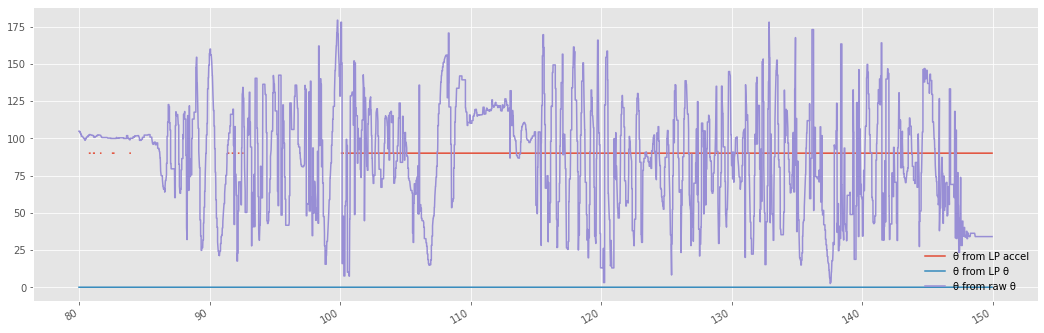

In [78]:
x = data_acc['elapsed_time'][l_bound:u_bound]

fig, ax = plt.subplots()
fig.set_size_inches(18, 6)

# plot low pass accel to theta 
y = theta_low_pass_accel[l_bound:u_bound]
ax.plot(x,y, label='θ from LP accel')

# plot low pass theta to theta
y = low_pass_theta[l_bound:u_bound]
ax.plot(x,y, label='θ from LP θ')

# plot theta
y = theta[l_bound:u_bound]
ax.plot(x,y, label='θ from raw θ')

# beautify the x-labels
plt.gcf().autofmt_xdate()
ax.legend(loc='lower right', frameon=False)
plt.show()

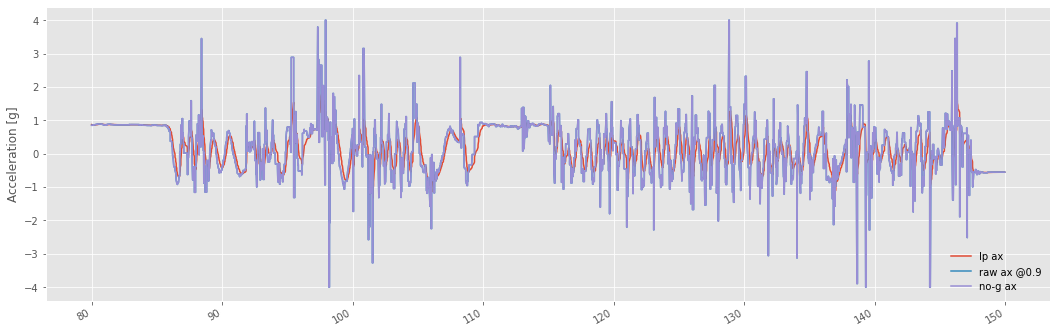

In [79]:
x = data_acc['elapsed_time'][l_bound:u_bound]

columns = ['ax', 'ay','az']

selected_axis = 0

fig, ax = plt.subplots()
fig.set_size_inches(18, 6)

# plot low pass accel
y = low_pass_accel[l_bound:u_bound, selected_axis]
ax.plot(x,y, label='lp '+columns[selected_axis])

# plot raw accel
y = data_acc[columns[selected_axis]][l_bound:u_bound]
ax.plot(x,y, label='raw '+columns[selected_axis]+' @'+str(selected_bias))

# plot no_gravity_acc
y = no_gravity_acc[l_bound:u_bound, selected_axis]
ax.plot(x,y, label='no-g '+columns[selected_axis])

# beautify the x-labels
plt.gcf().autofmt_xdate()
ax.legend(loc='lower right', frameon=False)
ax.set_ylabel('Acceleration [g]',fontsize=12)
plt.show()

# Gyroscope

In [80]:
data_gyr = ball_IMU[['elapsed_time', 'gx', 'gy','gz']]
# data_gyr.rename(columns={'gx':'x', 'gy':'y', 'gz':'z'})
data_gyr.head(5)

,elapsed_time,gx,gy,gz
0,0.000,-5.065918,-8.850098,-15.014648
1,0.001,-5.065918,-8.850098,-15.014648
2,0.001,-5.065918,-8.850098,-15.014648
3,0.024,-5.065918,-8.850098,-15.014648
4,0.025,-5.065918,-8.850098,-15.014648


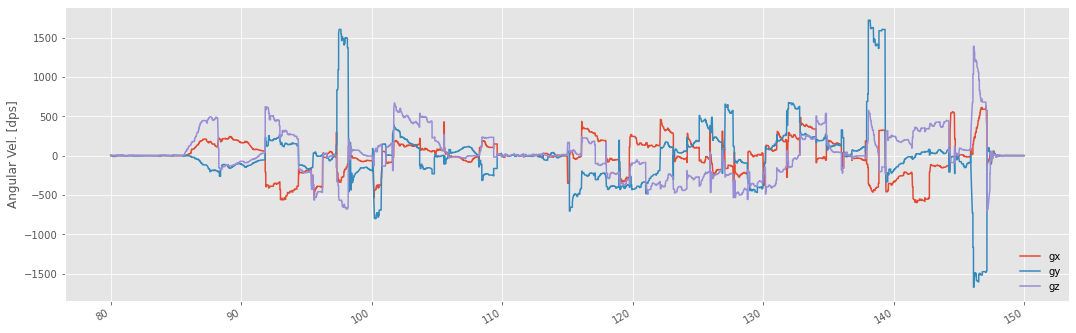

In [81]:
# selected elapsed time
x = data_gyr['elapsed_time'][l_bound:u_bound]

fig, ax = plt.subplots()
fig.set_size_inches(18, 6)

# plot x
y = data_gyr['gx'][l_bound:u_bound]
ax.plot(x,y, label='gx')


# plot y
y = data_gyr['gy'][l_bound:u_bound]
ax.plot(x,y, label='gy')

# plot z
y = data_gyr['gz'][l_bound:u_bound]
ax.plot(x,y, label='gz')

# plot absolute
# y = raw_data['spin_abs'][l_bound:u_bound]
# ax.plot(x,y, label='spin_abs')

# beautify the x-labels
plt.gcf().autofmt_xdate()
ax.legend(loc='lower right', frameon=False)
ax.set_ylabel('Angular Vel. [dps]',fontsize=12)
plt.show()

## High-pass filter 

In [1]:
high_pass_slider = IntSlider(min=0, max=100)
high_pass_slider.value = 80
high_pass_slider

NameError: name 'IntSlider' is not defined

In [83]:
class HighPassFilterData:
    def __init__(self, reading, cutoffFrequency):
        self.x = reading[1]
        self.y = reading[2]
        self.z = reading[3] 
        self.cutoff = cutoffFrequency
        self.timestamp = reading[0] 

    def update(self, reading):
        dt = reading[0] - self.timestamp / 1000;
        self.timestamp = reading[0];

        alpha = self.cutoff / (self.cutoff + dt);
        self.x = self.x + alpha * (reading[1] - self.x)
        self.y = self.y + alpha * (reading[2] - self.y)
        self.z = self.z + alpha * (reading[3] - self.z)

gyro = data_gyr.iloc[0,:]
selected_cutoffFrequency =  high_pass_slider.value/100               
# Remove drift with a  high pass filter.
filter = HighPassFilterData(gyro, selected_cutoffFrequency);
print(filter.x, filter.y, filter.z, filter.cutoff, filter.timestamp)

high_pass_gyro = np.ndarray(shape=(rows,4), dtype=float)
for i in range(rows):
    
    gyro = np.array(data_gyr.iloc[i,:])
    filter.update(gyro); # Pass latest values through filter.
#     print(f'Steady gyroscope (${filter.x}, ${filter.y}, ${filter.z})')
    high_pass_gyro[i] = [filter.timestamp, filter.x, filter.y, filter.z]

# print(high_pass_gyro, data_gyr.iloc[:, 1:])
high_pass_gyro = pd.DataFrame(data=high_pass_gyro, columns=['elapsed_time', 'gx', 'gy', 'gz'])
high_pass_gyro

-5.06591796875 -8.85009765625 -15.0146484375 0.8 0.0


,elapsed_time,gx,gy,gz
0,0.000,-5.065918,-8.850098,-15.014648
1,0.001,-5.065918,-8.850098,-15.014648
2,0.001,-5.065918,-8.850098,-15.014648
3,0.024,-5.065918,-8.850098,-15.014648
4,0.025,-5.065918,-8.850098,-15.014648
...,...,...,...,...
9057,170.427,-0.763602,-2.909559,2.402371
9058,170.554,-0.765168,-2.898814,2.392570
9059,170.619,-0.766725,-2.888123,2.382819
9060,170.726,-0.768275,-2.877489,2.373119


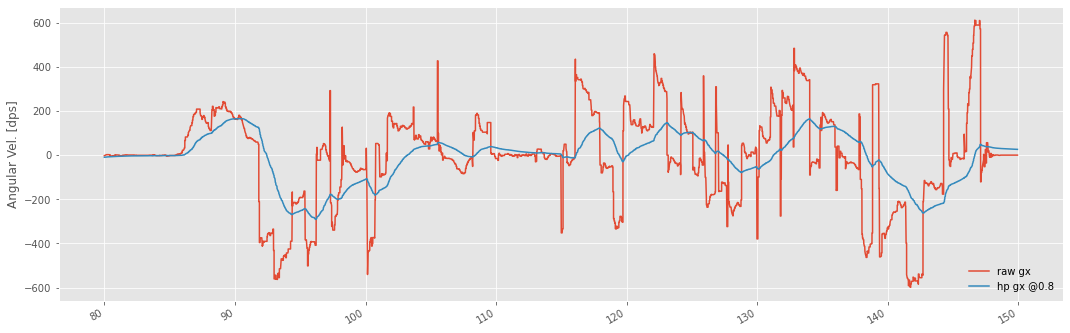

In [84]:
# selected elapsed time
x = high_pass_gyro['elapsed_time'][l_bound:u_bound]

fig, ax = plt.subplots()
fig.set_size_inches(18, 6)

# plot raw x
y = data_gyr['gx'][l_bound:u_bound]
ax.plot(x,y, label='raw gx')


# plot HP x
y = high_pass_gyro['gx'][l_bound:u_bound]
ax.plot(x,y, label='hp gx @'+str(selected_cutoffFrequency))


# plot absolute
# y = raw_data['spin_abs'][l_bound:u_bound]
# ax.plot(x,y, label='spin_abs')

# beautify the x-labels
plt.gcf().autofmt_xdate()
ax.legend(loc='lower right', frameon=False)
ax.set_ylabel('Angular Vel. [dps]',fontsize=12)
plt.show()

# Complementary filter (Kalman filter)
<br>
https://www.w3.org/TR/motion-sensors/#complementary-filter 
</br>   
<br><br>
A complementary filter can be thought of as a low-pass filter and high-pass filter in one, complementing the gyroscope values with the accelerometer values:
</br><br>
$$ \theta_{n} = \alpha × (\theta_{n-1} + \omega * ∂t) + (1.0 - \alpha) × a $$
<br><br>
With α being the weight constant, a the acceleration from accelerometer, ω the angular velocity from gyroscope and ∂t being the time between measurements.
<br><br>
A common value for α is 0.98, which means that 98% of the weight lays on the gyroscope measurements.

In [85]:
complementary_alpha = IntSlider(min=0, max=100)
complementary_alpha.value = 98
complementary_alpha

IntSlider(value=98)

In [86]:
# Todo

# Calculating yaw with magnetometer

In [87]:
# i = 0
# Xm=calibrated_mag['mx'][i]*cos(radians(theta[i]))-calibrated_mag['my'][i]*sin(phiRad)*sin(radians(theta[i]))+calibrated_mag['mz'][i]*cos(phiRad)*sin(radians(theta[i]))
# Ym=calibrated_mag['my'][i]*cos(phiRad)+calibrated_mag['mz'][i]*sin(phiRad)

# psi[i]=degrees(atan2(Ym,Xm))

## Magnetic declination

https://www.codeproject.com/Articles/1112064/Calculating-True-North-for-IoT-Applications

# Algebraic Quaternion Algorithm
https://ahrs.readthedocs.io/en/latest/filters/aqua.html#algebraic-quaternion-algorithm

In [88]:
!pip install pyquaternion

# http://kieranwynn.github.io/pyquaternion/

In [89]:
from pyquaternion import Quaternion

## Quaternion as Orientation

https://ahrs.readthedocs.io/en/latest/filters/aqua.html#quaternion-as-orientation

The link explains the concept behind the math, however, we will use Quaternion from pyquaternion library to perform the math.
Check the module documentation for use case at
http://kieranwynn.github.io/pyquaternion/
<br><br>

Any orientation in a three-dimensional euclidean space of a frame $A$ with respect to a frame $B$ can be represented by a unit quaternion (a.k.a. versor), $q\in \mathbb{H}^4$, in Hamiltonian space defined as:
<br></br>
$$ _A^Bq = \begin{bmatrix}q_w \\ q_x \\ q_y \\ q_z \end{bmatrix} = \begin{bmatrix} \cos{\frac{\alpha}{2}} \\ e \sin{\frac{\alpha}{2}} \\ e \sin{\frac{\alpha}{2}} \\ e \sin{\frac{\alpha}{2}} \end{bmatrix} $$
<br></br>
where $α$ is the rotation angle and $e$ is the unit vector representing the rotation axis. The conjugate quaternion is used to represent the orientation of frame $B$ relative to frame $A$:
<br></br>
$$ _A^Bq^\ast = _B^Aq = \begin{bmatrix}q_w \\ - q_x \\ - q_y \\ - q_z \end{bmatrix} $$
<br></br>
The orientation quaternion after a sequence of rotations can be easily found by quaternion multiplication:
<br></br>
$$ _A^Cq = _B^Cq {_A^B}q $$
<br></br>
where the quaternion multiplication of quaternions $p$ and $q$ is computed as:
<br></br>
$$ pq =  \begin{bmatrix} p_w q_w -  p_x q_x -  p_y q_y -  p_z q_z \\ p_w q_x +  p_x q_w +  p_y q_z -  p_z q_y  \\ p_w q_y -  p_x q_z +  p_y q_w + p_z q_x  \\ p_w q_z +  p_x q_y -  p_y q_x +  p_z q_w  \end{bmatrix}$$
<br></br>
Unit quaternions in Hamiltonian spaces are often used to operate rotations of vectors in a 3D euclidean space. A vector $ ^Av_q = \begin{bmatrix}v_x & v_y & v_z\end{bmatrix}^T $ expressed with respect to frame $A$ can be represented with respect to frame $B$ as:
<br></br>
$$^Bv_q = ^B_Aq ^A{v_q} {^B_A}q^\ast$$
<br></br>
where the vector $^Av$ is rewritten as the pure quaternion $^Av_q=\begin{bmatrix}0 & v_x & v_y & v_z\end{bmatrix}^T$, so that it can multiply with the versor and its conjugate.<br><br>
The inverse rotation can be achieved by flipping the versors:
<br></br>
$$ ^{A}v_q = {^B_A}q^{\ast} {^B}v_q {^B_A}q = {^A_B}q {^B}v_q {^A_B}q^\ast $$
<br></br>

The rotations can also be expressed within the three-dimensional euclidean space if we express the rotation as a Direction Cosine Matrix $\mathbf{R} \in SO(3)$:

<br></br>
$$ R(^B_Aq) = \begin{bmatrix} q_w^2 + q_x^2 - q_y^2 - q_z^2 & 2(q_x q_y - q_w q_z) & 2(q_x q_z+q_w q_y) \\ 2(q_x q_y + q_w q_z) & q_w^2 - q_x^2 + q_y^2 - q_z^2 & 2(q_y q_z+q_w q_x) \\ 2(q_x q_z + q_w q_y) & 2(q_w q_x + q_y q_z) & q_w^2 - q_x^2 - q_y^2 + q_z^2\end{bmatrix} $$
<br></br>
And, because the Direction Cosine Matrix belongs to the Special Orthogonal Group $SO(3)$, the inverse rotation is simply its transpose:
<br></br>
$$^Av = \mathbf{R}(^A_Bq){^B}v = \mathbf{R}^T(^B_Aq){^B}v$$

In [90]:
def ManualQuaternion(vector, rotation_angle_degrees):
    x, y, z = vector
    angle = radians(rotation_angle_degrees)
    e_unit_vector= 1
    q = [
        cos(angle/2),
        x * sin(angle/2),
        y * sin(angle/2),
        z * sin(angle/2)
    ]
    return q

def ManualConjugate(quaternion):
    qw, qx, qy, qz = quaternion
    q = [
        qw,
        -qx,
        -qy,
        -qz
    ]
    return q

def QuaternionPoduct(quaternion_1, quaternion_2):
    pw, px, py, pz = quaternion_1
    qw, qx, qy, qz = quaternion_2
    pq = [pw*qw - px*qx - py*qy - pz*qz,
          pw*qx + px*qw + py*qz - pz*qy,
          pw*qy - px*qz + py*qw + pz*qx,
          pw*qz + px*qy - py*qx + pz*qw,
         ]
    return pq

def DirectCosineMatrix(quaternion):
    qw, qx, qy, qz = quaternion
    Rq = [
        [qw**2+qx**2-qy**2-qz**2, 2*(qx*qy-qw*qz), 2*(qx*qz+qw*qy)],
        [2*(qx*qy+qw*qz), qw**2-qx**2+qy**2-qz**2, 2*(qy*qz-qw*qx)],
        [2*(qx*qz-qw*qy), 2*(qw*qx-qy*qz), qw**2-qx**2-qy**2+qz**2]
         ]
    return Rq

In [91]:
Av = [1., 0., 0.]
rotation_angle = 90
BAq_0 = Quaternion(axis=Av, angle=0)
# https://kieranwynn.github.io/pyquaternion/#explicitly-by-rotation-parameters
BAq = Quaternion(axis=Av, angle=radians(rotation_angle))
BAq_manual = ManualQuaternion(Av, rotation_angle)
BAq_0, BAq, BAq_manual


(Quaternion(1.0, 0.0, 0.0, 0.0),
 Quaternion(0.7071067811865476, 0.7071067811865476, 0.0, 0.0),
 [0.7071067811865476, 0.7071067811865476, 0.0, 0.0])

In [92]:
Bv = [0., 1., 0.]
rotation_angle = 90
CBq = Quaternion(axis=Bv, angle=radians(rotation_angle))
CBq

Quaternion(0.7071067811865476, 0.0, 0.7071067811865476, 0.0)

In [93]:
CAq = BAq * CBq
CAq_manual = QuaternionPoduct(BAq, CBq)
CAq, CAq_manual

(Quaternion(0.5000000000000001, 0.5000000000000001, 0.5000000000000001, 0.5000000000000001),
 [0.5000000000000001,
  0.5000000000000001,
  0.5000000000000001,
  0.5000000000000001])

In [94]:
rotated_a = CAq.rotate([1,0,0])
rotated_b = BAq.rotate([1,0,0])
rotated_c = np.matmul(CAq.rotation_matrix, [1,0,0])
rotated_d = np.matmul(BAq.rotation_matrix, [1,0,0])
rotated_a, rotated_b, rotated_c, rotated_d

([0.0, 1.0000000000000004, 0.0],
 [1.0000000000000002, 0.0, 0.0],
 array([-1.23259516e-32,  1.00000000e+00, -1.23259516e-32]),
 array([1., 0., 0.]))

In [95]:
Avq = Quaternion(scalar=0, vector=Av)

Bvq = BAq * Avq * BAq.conjugate
Bvq_manual =  BAq_manual * Avq * ManualConjugate(BAq)

Bvq, Bvq_manual

(Quaternion(0.0, 1.0000000000000002, 0.0, 0.0),
 Quaternion(0.0, 1.0000000000000002, 0.0, 0.0))

In [96]:
Bv = Bvq.vector
Bv

array([1., 0., 0.])

In [97]:
RBAq_manual = DirectCosineMatrix(BAq)
RBAq = BAq.rotation_matrix

RBAq_manual, RBAq

([[1.0000000000000002, 0.0, 0.0],
  [0.0, 0.0, -1.0000000000000002],
  [0.0, 1.0000000000000002, 0.0]],
 array([[ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  4.26642159e-17, -1.00000000e+00],
        [ 0.00000000e+00,  1.00000000e+00, -4.26642159e-17]]))

In [98]:
Av3 = np.matmul(BAq.conjugate.rotation_matrix,Bv)
Av4 = np.matmul(np.transpose(BAq.rotation_matrix),Bv)

Av3, Av4

(array([1., 0., 0.]), array([1., 0., 0.]))

Given two quaternions $p$ and $q$, the cosine of the angle $Ω$ subtended by the arc between them is equal to the dot product of the two quaternions.
<br></br>
$$ \cos\Omega = p \cdot q = p_w q_w + p_x q_x + p_y q_y + p_z q_z$$
<br></br>
It is easy to see that the dot product of any $q=\begin{bmatrix}q_w & q_x & q_y & q_z\end{bmatrix}$ and the identity quaternion $q_I=\begin{bmatrix}1 & 0 & 0 & 0\end{bmatrix}$ is equal to the qw component:
<br></br>
$$ q \cdot q_I = q_w$$
<br></br>
The simple <b>Linear intERPolation</b> (LERP) between two quaternions $p$ and $q$ is obtained as:
<br></br>
$$ \bar{r} = (1 - \alpha)p + \alpha q$$
<br></br>
where $α \in [0,1]$. But this does not keep the unit norm, so we must normalize the resulting interpolation:
<br></br>
$$ \hat{r} = \frac{\bar{r}}{\parallel \bar{r} \parallel} $$
<br></br>

The <b>Spherical Linear intERPolation</b> (SLERP) gives a correct evaluation of the weighted average of two points lying on a curve. In the case of quaternions, the points lie on the surface of the 4D sphere (hypersphere).
<br></br>
$$ \hat{r} = \frac{ \sin([1 - \alpha]\Omega)}{ \sin(\Omega)}p + \frac{\sin(\alpha \Omega)}{ \sin(\Omega)}q$$
<br></br>

In [99]:
q0 = BAq_0
q1 = BAq
a = 0.5
cos_omega = np.dot(q0, q1)
omega = acos(cos_omega)
r = Quaternion.slerp(q0, q1, a)
r_manual = (sin((1-a)*omega)/sin(omega))*q0+(sin(a*omega)/sin(omega))*q1
r, r_manual
 

(Quaternion(0.9238795325112867, 0.38268343236508984, 0.0, 0.0),
 Quaternion(0.9238795325112868, 0.38268343236508984, 0.0, 0.0))

## Quaternion from Earth-Field Observations
https://ahrs.readthedocs.io/en/latest/filters/aqua.html#quaternion-from-earth-field-observations

The local (sensor) frame is labeled as $L$, and the global (Earth) frame as $G$. The measured acceleration, $^{L}a$, and the true Earth gravitational acceleration, $^{G}g$, are defined as unit vectors:

$$ ^{L}a = \begin{bmatrix} a_{x} & a_{y} &a_{z} \end{bmatrix} ^{T} $$
<br>
$$ ^{G}g = \begin{bmatrix} 0 & 0 & 1 \end{bmatrix} ^{T} $$
<br></br>
The measured local magnetic field, $^{L}m$, and the true geomagnetic field, $^{G}h$, are also unit vectors:
<br></br>
$$ ^{L}m = \begin{bmatrix} m_{x} & m_{y} & m_{z} \end{bmatrix} ^{T} $$
<br>
$$ ^{G}h = \begin{bmatrix} h_{x} & h_{y} & h_{z} \end{bmatrix} ^{T} $$
<br></br>
The gyroscopes measure the angular velocity, $^{L}\omega$, around the three sensor frame axes:
<br></br>
$$ ^{L}\omega = \begin{bmatrix} \omega_{x} & \omega_{y} & \omega_{z} \end{bmatrix} ^{T} $$


In [100]:
t = 0
La = norm_acc[t]
Gg = np.array([0,0,1], dtype=float)
Lm = np.array(calibrated_mag.iloc[t, 1:], dtype=float)
Lw = np.array([radians(data_gyr.iloc[t, 1]), radians(data_gyr.iloc[t, 2]), radians(data_gyr.iloc[t, 3])], dtype=float)


print(f'l acc:\n{La}, \n\n Global g:\n{Gg}, \n\n local mag:\n{Lm}, \n\n local angular velocity:\n{Lw}')

l acc:
[ 0.7191777  -0.61598133  0.32148164], 

 Global g:
[0. 0. 1.], 

 local mag:
[ -4.47998047 -19.65332031  -0.69580078], 

 local angular velocity:
[-0.08841695 -0.15446334 -0.26205505]


In [101]:
La = np.ndarray(shape=(rows,3), dtype=float)
Lm = np.ndarray(shape=(rows,3), dtype=float)
Lw = np.ndarray(shape=(rows,3), dtype=float)

Gg = np.array([0,0,1], dtype=float)

for t in range(rows):

    La[t] = norm_acc[t]
    Lm[t] = calibrated_mag.iloc[t, 1:]
    Lw[t] = radians(data_gyr.iloc[t, 1]), radians(data_gyr.iloc[t, 2]), radians(data_gyr.iloc[t, 3])

    
print(f'Local acc:\n{La}, \n\n Global g:\n{Gg}, \n\n Local mag:\n{Lm}, \n\n Local angular velocity:\n{Lw}')

Local acc:
[[ 0.7191777  -0.61598133  0.32148164]
 [ 0.71499029 -0.61068938  0.34036359]
 [ 0.71212488 -0.59880975  0.36647652]
 ...
 [-0.56198985 -0.08259511  0.82301   ]
 [-0.56198985 -0.08259511  0.82301   ]
 [-0.56198985 -0.08259511  0.82301   ]], 

 Global g:
[0. 0. 1.], 

 Local mag:
[[ -4.47998047 -19.65332031  -0.69580078]
 [ -4.47998047 -19.65332031  -0.69580078]
 [ -4.47998047 -19.65332031  -0.69580078]
 ...
 [  0.           6.84814453  -0.95214844]
 [  0.           6.84814453  -0.95214844]
 [  0.           6.84814453  -0.95214844]], 

 Local angular velocity:
[[-0.08841695 -0.15446334 -0.26205505]
 [-0.08841695 -0.15446334 -0.26205505]
 [-0.08841695 -0.15446334 -0.26205505]
 ...
 [-0.01917476 -0.01065264  0.00532632]
 [-0.01917476 -0.01065264  0.00532632]
 [-0.01917476 -0.01065264  0.00532632]]


The measured angular velocities are <b>not</b> normalized, unlike the other sensors, and are assumed to be in radians per second.

A straightforward way to formulate the quaternion, $^{L}_{G}q$, relating the global frame $G$ to the local frame $L$, is through the inverse orientation which rotates the measured quantities $^La$ and $^Lm$ into the reference quantities $^{G}g$ and $^{G}h$:
<br></br>
$$ R^{T} (^{L}_{G}q) ^{L}a = {^G}g $$
<br>
$$ R^{T} (^{L}_{G}q) ^{L}m = {^G}h $$
<br></br>

In the case of a disagreement between the gravitational and magnetometer readings, the system will not have a solution. To address this problem a modified equation system is built.

First, the global coordinate frame G is aligned with the magnetic North. The global frame’s X-axis points to the same direction as the local magnetic field (Z-axis remains vertical.)

The orientation $^{L}_{G}q$ is decomposed into two auxiliary quaternions, such that:
<br></br>
$$ ^{L}_{G}q = q_{acc} q_{mag}$$
<br></br>
$$ R(^{L}_{G}q) = R(q_{acc}) R(q_{mag}) $$
<br></br>
The quaternion $q_{mag}$ represents a rotation around the Z-axis to point North only:
<br></br>
$$ q_{mag} = \begin{bmatrix} q_{\omega mag} & 0 & 0 & q_{z mag} \end{bmatrix} $$


## Quaternion from Accelerometer
<br>
The auxiliary quaternion $q_{acc}$ is built as a function of $^La$. The observations of the gravity vector in the two reference frames allows us to find the quaternion that performs the transformation between the two representations.
<br><br>


$$ R(^L_Gq) ^{G}g = ^{L}a $$
<br></br>
$$ R(q_{acc}) R(q_{mag}) \begin{bmatrix} 0 \\ 0 \\ 1 \end{bmatrix} = \begin{bmatrix} a_x \\ a_y \\ a_z \end{bmatrix} $$
<br><br>
The alignment of the gravity vector from global frame into local frame can be achieved by infinite rotations with definite roll and pitch angles and arbitrary yaw. To restrict the solutions to a finite number $q_{zacc}=0$ is chosen.
<br></br>
This gives four solutions of $q_{acc}$. Two are discarded for having a negative norm, and from the remaining two the one with a positive $q_\omega$ is taken.
<br></br>

$$ q_{acc} = \begin{bmatrix} \sqrt{\frac{a_z + 1}{2}} & - \frac{a_y}{\sqrt{2(a_z+1)}} & \frac{a_x}{\sqrt{2(a_z+1)}} & 0 \end{bmatrix} ^T $$
<br>

$$ q_{acc} = \begin{cases} \begin{bmatrix} \sqrt{\frac{a_z + 1}{2}} & - \frac{a_y}{\sqrt{2(a_z+1)}} & \frac{a_x}{\sqrt{2(a_z+1)}} & 0 \end{bmatrix} ^T & x \ge 0 \\ \begin{bmatrix} - \frac{a_y}{\sqrt{2(1 - a_z)}} & \sqrt{\frac{1- a_z}{2}}  & 0 & \frac{a_x}{\sqrt{2(1- a_z)}} \end{bmatrix} ^T & x < 0 \end{cases}  $$

In [102]:
t = 0

ax, ay, az = La[t]
print(ax, ay, az)

qw = sqrt((az+1)/2)
qx = -(ay/sqrt(2*(az+1)))
qy = ax/sqrt(2*(az+1))
qz = 0

qacc_0 = Quaternion(qw, qx, qy, qz)

qacc_0

0.7191776988705728 -0.6159813256507022 0.3214816385065114


Quaternion(0.8128596553238792, 0.3788977110724409, 0.44237507308935187, 0.0)

In [103]:
columns = ['qw', 'qx', 'qy', 'qz']
qacc = []
# qacc = pd.DataFrame(data=qacc, columns=columns)

for t in range(rows):
    ax, ay, az = La[t]
#     print (f'T: {t}, {ax}, {ay}, {az}')
    if az >= 0:
        qw = sqrt((az+1)/2)
        qx = -(ay/sqrt(2*(az+1)))
        qy = ax/sqrt(2*(az+1))
        qz = 0
    else:
        qw = -(ay/sqrt(2*(1-az)))
        qx = sqrt((1-az)/2)
        qy = 0
        qz = ax/sqrt(2*(1-az))
        
    qacc.append(Quaternion(qw, qx, qy, qz))

qacc[0:10]

[Quaternion(0.8128596553238792, 0.3788977110724409, 0.44237507308935187, 0.0),
 Quaternion(0.8186463194760011, 0.3729873102097526, 0.436690588438646, 0.0),
 Quaternion(0.826582277589011, 0.3622202904643913, 0.43076466841148314, 0.0),
 Quaternion(0.8290276193439529, 0.3595688864521542, 0.4282796075701664, 0.0),
 Quaternion(0.822764143378166, 0.36191717833378834, 0.43826375665585404, 0.0),
 Quaternion(0.823709885483458, 0.357796690485456, 0.4398676537715444, 0.0),
 Quaternion(0.8220642863330759, 0.35984154327439044, 0.44127584668730224, 0.0),
 Quaternion(0.821270982284587, 0.358062640970843, 0.4441904082691282, 0.0),
 Quaternion(0.8201615300032595, 0.3576205703631896, 0.4465899599809868, 0.0),
 Quaternion(0.8133185197936659, 0.3636285548670763, 0.45418857256201645, 0.0)]

## Quaternion from Magnetometer
<br>
The auxiliary quaternion $q_{mag}$ is derived as a function of $^Lm$ and $q_{acc}$.
<br><br>
The quaternion $q_{acc}$ is used to rotate the magnetic field vector $^Lm$ into an intermediate frame whoe Z-axis is the same as the global coordinate frame with X- and Y-axes pointing to unknown directions due to the unknown yaw of $q_{acc}$.

$$ R^T (q_{acc})^Lm = 1 $$
<br>

</br>
where $l$ is the rotated magnetic field vector. Then, we find the quaternion $q_{mag}$ that rotates the vector $l$ into the vector that lies on $^GΠ_{zx^+}$:

<br></br>

$$ R^T (q_{mag}) \begin{bmatrix} l_x \\ l_y \\ l_z \end{bmatrix} = \begin{bmatrix} \sqrt{Γ} \\ 0 \\ l_z \end{bmatrix} $$
<br>
where $ Γ = l^2_x + l^2_y $. This quaternion performs a rotation only about the global Z-axis to align the X-axis of the intermediate frame with the X-axis of the global frame without affecting the roll and pitch. Therefore, if there is a magnetic interference, it would affect only the heading angle.

The solution to find this quaternion ensuring the shortest rotation is:
<br></br>
$$ q_{mag} = \begin{bmatrix} \frac{\sqrt{Γ + l_x \sqrt{Γ}}}{\sqrt{2Γ}} & 0 & 0 & \frac{l_y}{\sqrt{2}\sqrt{Γ+l_x\sqrt{Γ}}} \end{bmatrix}^T $$

<br>

This quaternion has a singularity too, but here it happens when $l_x < 0$ and $l_y=0 $. Eventually, a simliar solution is found restraining the condition of $l_x$:
<br></br>

$$ q_{mag} = \begin{cases} \begin{bmatrix} \frac{\sqrt{Γ + l_x \sqrt{Γ}}}{\sqrt{2Γ}} & 0 & 0 & \frac{l_y}{\sqrt{2}\sqrt{Γ+l_x\sqrt{Γ}}} \end{bmatrix} ^T & \text{if } l_x \ge 0 \\ \begin{bmatrix} \frac{l_y}{\sqrt{2}\sqrt{Γ-l_x\sqrt{Γ}}} & 0 & 0 & \frac{\sqrt{Γ - l_x \sqrt{Γ}}}{\sqrt{2Γ}} \end{bmatrix} ^T & \text{if } l_x < 0 \end{cases}  $$

In [104]:
t = 0
mx, my, mz = Lm[t]
lx, ly, lz = mx, my, mz
print(mx, my, mz)

GAMMA = lx**2 + ly**2

if lx >= 0:
    qw = sqrt(GAMMA + lx*sqrt(GAMMA))/(sqrt(2*GAMMA))
    qx = 0
    qy = 0
    qz = ly / (sqrt(2)*sqrt(GAMMA + lx*sqrt(GAMMA)))
else:
    qw = ly / (sqrt(2)*sqrt(GAMMA - lx*sqrt(GAMMA)))
    qx = 0
    qy = 0
    qz = sqrt(GAMMA - lx*sqrt(GAMMA))/(sqrt(2*GAMMA))

qmag_0 = Quaternion(qw, qx, qy, qz)

qmag_0

-4.47998046875 -19.6533203125 -0.69580078125


Quaternion(-0.6235987304874728, 0.0, 0.0, 0.781744602369861)

In [105]:
columns = ['qw', 'qx', 'qy', 'qz']
qmag = []
# qacc = pd.DataFrame(data=qacc, columns=columns)

for t in range(rows):
    lx, ly, lz = Lm[t]
#     print (f'T: {t}, {ax}, {ay}, {az}')
    GAMMA = lx**2 + ly**2

    if lx >= 0:
        qw = sqrt(GAMMA + lx*sqrt(GAMMA))/(sqrt(2*GAMMA))
        qx = 0
        qy = 0
        qz = ly / (sqrt(2)*sqrt(GAMMA + lx*sqrt(GAMMA)))
    else:
        qw = ly / (sqrt(2)*sqrt(GAMMA - lx*sqrt(GAMMA)))
        qx = 0
        qy = 0
        qz = sqrt(GAMMA - lx*sqrt(GAMMA))/(sqrt(2*GAMMA))
#     if t <= 10:
#         print (f'T: {t}, {qw}, {qx}, {qy}, {qz}, qmag[{t}]: {Quaternion(qw, qx, qy, qz)}')
    qmag.append(Quaternion(qw, qx, qy, qz))

qmag[0:10]

[Quaternion(-0.6235987304874728, 0.0, 0.0, 0.781744602369861),
 Quaternion(-0.6235987304874728, 0.0, 0.0, 0.781744602369861),
 Quaternion(-0.6235987304874728, 0.0, 0.0, 0.781744602369861),
 Quaternion(-0.6235987304874728, 0.0, 0.0, 0.781744602369861),
 Quaternion(-0.6235987304874728, 0.0, 0.0, 0.781744602369861),
 Quaternion(-0.6235987304874728, 0.0, 0.0, 0.781744602369861),
 Quaternion(-0.6235987304874728, 0.0, 0.0, 0.781744602369861),
 Quaternion(-0.6235987304874728, 0.0, 0.0, 0.781744602369861),
 Quaternion(-0.6235987304874728, 0.0, 0.0, 0.781744602369861),
 Quaternion(-0.6235987304874728, 0.0, 0.0, 0.781744602369861)]

The generalized quaternion orientation of the global frame relative to the local frame as the mulitplication of two quaternions $q_{acc}$ and $q_{mag}$:
<br>
$$ ^L_Gq = q_{acc} q_{mag} $$

The quaternion $ ^L_Gq $ does not suffer from the discontinuity problem of the yaw angle given by the switching formulation of $q_{acc}$ thanks to the multiplication with $q_{mag}$, which performs the alignment of the intermediate frame into the global frame.

In [106]:
LGq_0 = qacc_0 * qmag_0
LGq = qacc[0] * qmag[0]


LGq_0, LGq

(Quaternion(-0.5068982491244558, 0.10954419400119014, -0.5720657744589986, 0.6354486480336682),
 Quaternion(-0.5068982491244558, 0.10954419400119014, -0.5720657744589986, 0.6354486480336682))

In [107]:
LGq = []
for t in range(rows):

    LGq.append(qacc[t] * qmag[t])
    
# qlg[0:10] 
LGq[2000:2010]  

[Quaternion(0.21494538756662754, 0.5674424787543934, 0.09778069669655284, 0.7888259941345993),
 Quaternion(0.21494538756662754, 0.5674424787543934, 0.09778069669655284, 0.7888259941345993),
 Quaternion(0.21494538756662754, 0.5674424787543934, 0.09778069669655284, 0.7888259941345993),
 Quaternion(-0.6262588352355534, 0.19466210992056734, -0.7143885901288867, 0.24403990768794898),
 Quaternion(-0.6262588352355534, 0.19466210992056734, -0.7143885901288867, 0.24403990768794898),
 Quaternion(0.2205908452891715, 0.5731807658122435, 0.0807893412244781, 0.7850328470975043),
 Quaternion(0.2205908452891715, 0.5731807658122435, 0.0807893412244781, 0.7850328470975043),
 Quaternion(0.2205908452891715, 0.5731807658122435, 0.0807893412244781, 0.7850328470975043),
 Quaternion(0.22378976085823366, 0.5598102008035917, 0.04743989735382875, 0.7964170629452355),
 Quaternion(0.2627106621393711, 0.5567974143052403, 0.07493092957983327, 0.7844393559820886)]

In [108]:
LGq[0].scalar, LGq[0].vector
qx, qy, qz = LGq[0].vector
qx, qy, qz

(0.10954419400119014, -0.5720657744589986, 0.6354486480336682)

## Test
$$ R^{T} (^{L}_{G}q) ^{L}a = {^G}g $$
<br>
$$ R^{T} (^{L}_{G}q) ^{L}m = {^G}h $$

In [109]:
t=0
Gg_test = np.matmul(np.transpose(LGq[t].rotation_matrix),La[t])
Gg_test, La[t], g_vectors[t]

(array([-2.77555756e-17, -5.55111512e-17,  1.00000000e+00]),
 array([ 0.7191777 , -0.61598133,  0.32148164]),
 array([ 5.55111512e-17, -2.77555756e-17,  9.54595003e-01]))

In [110]:
Gg_q = [np.matmul(np.transpose(LGq[t].rotation_matrix),La[t]) for t in range(rows)]

Gg_q[8000]

array([ 1.66533454e-16, -1.38777878e-17,  1.00000000e+00])

In [111]:
t=0
Gh_test = np.matmul(np.transpose(LGq[t].rotation_matrix),Lm[t])
Gh_test, Lm[t]

(array([17.50108815, -5.05125782,  8.66048908]),
 array([ -4.47998047, -19.65332031,  -0.69580078]))

## Test
<br><br>
$$ R(^L_Gq) ^{G}g = ^{L}a $$
<br></br>
$$ R(q_{acc}) R(q_{mag}) \begin{bmatrix} 0 \\ 0 \\ 1 \end{bmatrix} = \begin{bmatrix} a_x \\ a_y \\ a_z \end{bmatrix} $$
<br><br>

In [112]:
t=0
accel_vector = np.matmul(LGq[t].rotation_matrix,Gg_test)
accel_vector_b = np.matmul(np.matmul(qacc[t].rotation_matrix,qmag[t].rotation_matrix),Gg)
print(accel_vector)
print(accel_vector_b)
print(La[t])

[ 0.7191777  -0.61598133  0.32148164]
[ 0.7191777  -0.61598133  0.32148164]
[ 0.7191777  -0.61598133  0.32148164]


### Acceleration N, E, D
https://www.youtube.com/watch?v=T9jXoG0QYIA&ab_channel=ScottLobdell

In [113]:
t=8000
NEDaccel_vector = np.matmul(LGq[t].inverse.rotation_matrix,La[t])

print(NEDaccel_vector)

NEDaccel = np.array([np.matmul(LGq[t].inverse.rotation_matrix,La[t]) for t in range(rows)])

[ 8.32667268e-17 -1.38777878e-17  1.00000000e+00]


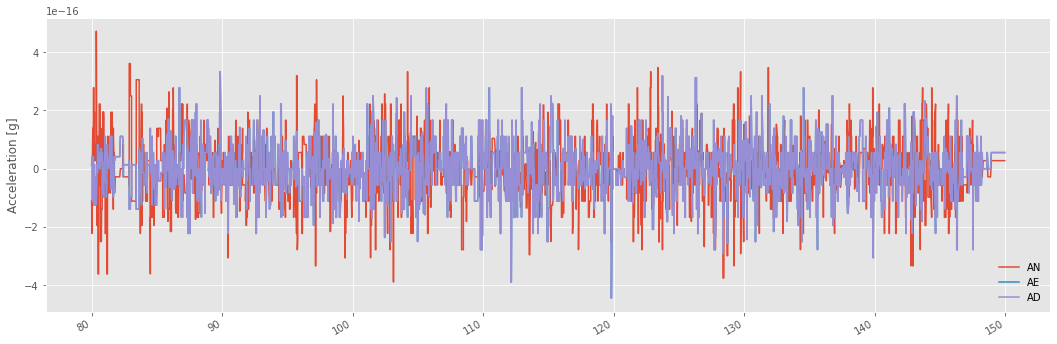

In [114]:
# selected elapsed time
x = data_acc['elapsed_time'][l_bound:u_bound]

fig, ax = plt.subplots()
fig.set_size_inches(18, 6)

# plot N
y = NEDaccel[l_bound:u_bound, 0]
ax.plot(x,y, label='AN')

# plot E
y = NEDaccel[l_bound:u_bound, 1]
ax.plot(x,y, label='AE')

# plot D
# y = NEDaccel[l_bound:u_bound, 2]
ax.plot(x,y, label='AD')

# plot absolute
# y = raw_data['spin_abs'][l_bound:u_bound]
# ax.plot(x,y, label='spin_abs')

# beautify the x-labels
plt.gcf().autofmt_xdate()
ax.legend(loc='lower right', frameon=False)
ax.set_ylabel('Acceleration [g]',fontsize=12)
plt.show()

In [115]:
t=400
Gg_q[t], NEDaccel[t]

(array([ 5.55111512e-17, -5.55111512e-17,  1.00000000e+00]),
 array([ 5.55111512e-17, -5.55111512e-17,  1.00000000e+00]))

### Gravity offset from Quaternions

In [116]:
columns = ['ax', 'ay', 'az']
no_g_acc_q = np.ndarray(shape=(3, rows), dtype=float)

no_g_acc_q = [data_acc[col].values + np.transpose(NEDaccel)[i]*-1 if i > 0 else data_acc[col].values for i, col in enumerate(columns)]

no_g_acc_q = np.transpose(no_g_acc_q)

no_gravity_acc[:5], data_acc[:5], no_g_acc_q[:5]

(array([[ 0.68652344, -0.5880127 , -0.64771024],
        [ 0.69287109, -0.60345686, -0.63903485],
        [ 0.70117188, -0.61397056, -0.62261307],
        [ 0.70837402, -0.62455047, -0.62225397],
        [ 0.7154541 , -0.60038913, -0.64026261]]),
    elapsed_time        ax        ay        az
 0         0.000  0.686523 -0.588013  0.306885
 1         0.001  0.692871 -0.591797  0.329834
 2         0.001  0.701172 -0.589600  0.360840
 3         0.024  0.708374 -0.594727  0.373657
 4         0.025  0.715454 -0.590820  0.351074,
 array([[ 0.68652344, -0.5880127 , -0.69311523],
        [ 0.69287109, -0.59179687, -0.67016602],
        [ 0.70117188, -0.58959961, -0.63916016],
        [ 0.70837402, -0.59472656, -0.62634277],
        [ 0.7154541 , -0.59082031, -0.64892578]]))

## Apply magnegtic declination

In [120]:
#https://www.omnicalculator.com/physics/magnetic-declination
#https://www.magnetic-declination.com/#

vilha_velha_magnectic_declination = (-23.79)

vilha_velha_magnectic_declination

-23.79

# Quaternion-Based Complementary Filter

A complementary filter fuses attitude estimation in quaternion form from gyroscope data with accelerometer and magnetometer data in the form of a delta quaternion.

If only IMU data is provided (gyroscopes and accelerometers), it corrects only roll and pitch of the attitude. If magnetometer data is also provided (MARG) a second step is added to the algorithm where a magnetic delta quaternion is derived to correct the heading of the previous estimation by aligning the current frame with the magnetic field.

In the <b>Prediction</b> step the measured angular velocity is used to compute a first estimation of the orientation in quaternion form.

Most literature estimating the quaternion derivative from an angular rate measurement is usually calculated for the one representing the orientation of the local frame with respect to the global frame.
<br><br>
$$ ^G_L\dot{q}_{\omega,t_k} = \frac{1}{2} {^G_L}q_{t_{k-1}}{^L}\omega_{q,t_k} $$
<br><br>
However, Valenti uses the inverse orientation, so the quaternion derivative is computed using the inverse unit quaternion, which is simply the conjugate:
<br>
 $$ ^L_G\dot{q}_{\omega,t_k} = ^G_L\dot{q}^\ast_{\omega,t_k} = -\frac{1}{2}{^L}\omega_{q,t_k} {^L_G}q_{t_{k-1}} $$
 <br>          
where ${^L}\omega_{q,t_k}=\begin{bmatrix}0 & ω_x & ω_y & ω_z\end{bmatrix}^T$ is the measured angular velocity, in radians per second, arranged as a pure quaternion at time $t_k$, and ${^G_L}q_{t_{k-1}}$ is the previous estimate of the orientation.


In [121]:
t_m1 = 0
t = 1
print(Lw[t])
Lwq_0 = Quaternion(scalar=0, vector=Lw[t_m1])
Lwq_1 = Quaternion(scalar=0, vector=Lw[t])
print(f'Lwq_0:{Lwq_0}, Lwq_1:{Lwq_1}')
      
GLqw_star_0 = -(1/2)*Lwq_0*1
LGqw_0 = GLqw_star_0
print(f'LGqw_star_0:{GLqw_star_0}, LGqw_0:{LGqw_0}')

GLqw_star_1 = -(1/2)*Lwq_1*LGq[t_m1]
LGqw_1 = GLqw_star_1
print(f'LGqw_star_1:{GLqw_star_1}, LGqw_1:{LGqw_1}')

[-0.08841695 -0.15446334 -0.26205505]
Lwq_0:+0.000 -0.088i -0.154j -0.262k, Lwq_1:+0.000 -0.088i -0.154j -0.262k
LGqw_star_0:+0.000 +0.044i +0.077j +0.131k, LGqw_0:+0.000 +0.044i +0.077j +0.131k
LGqw_star_1:-0.044 +0.102i -0.053j -0.100k, LGqw_1:-0.044 +0.102i -0.053j -0.100k


In [122]:
LGqw_dot = []
    
for t in range(rows):
    if t == 0:
        Lwq = Quaternion(scalar=0, vector=Lw[t])
        GLqw_star = -(1/2)*Lwq*1
        LGqw_dot.append(GLqw_star)
    else:
        Lwq = Quaternion(scalar=0, vector=Lw[t])
        GLqw_star = -(1/2)*Lwq*LGq[t-1]
        LGqw_dot.append(GLqw_star)

LGqw_dot[0:10]

[Quaternion(0.0, 0.04420847409531536, 0.07723167161229791, 0.1310275256318985),
 Quaternion(-0.043922449647128256, 0.10162392612209403, -0.05288750952541173, -0.10016805951904005),
 Quaternion(-0.045112280495478024, 0.10074389576214247, -0.053465521492383844, -0.10022135691455755),
 Quaternion(-0.04695265709438021, 0.0994171863770848, -0.053849228585154375, -0.10049509630081029),
 Quaternion(-0.04747010950986096, 0.09902277662073125, -0.054089412881645635, -0.10051242004173037),
 Quaternion(-0.04648622083312085, 0.09987361668631545, -0.05274048859451298, -0.10084674303389828),
 Quaternion(-0.04692364862953677, 0.09961363410089755, -0.052317755051757404, -0.10112111728977481),
 Quaternion(-0.04655610369293201, 0.09988416264025073, -0.05220446970663918, -0.10108268575933912),
 Quaternion(-0.046591645533119286, 0.09991406831086647, -0.0516949562230693, -0.10129837992913031),
 Quaternion(-0.046484243323619806, 0.10002845309395444, -0.05132127368088948, -0.10142476678364173)]


The orientation of the global frame relative to local frame at time $t_k$ can be finally computed by numerically integrating the quaternion derivative using the sampling period $\Delta t=t_k−t_{k−1}$.
 <br><br>
 $$ ^L_Gq_{\omega,t_{k}}=^L_Gq_{\omega,t_{k-1}}+^L_G\dot{q}_{\omega,t_k}\Delta t $$
 <br><br>

In [123]:
t = 1
tk_1 = data_acc['elapsed_time'][t-1]
tk = data_acc['elapsed_time'][t]
LGqw=[0, 0]

delta_t = tk - tk_1
print(f'Delta T: {delta_t}')
LGqw[0] = LGqw_dot[0]
LGqw[t] = LGqw[t-1]+LGqw_dot[t]*delta_t

LGqw

Delta T: 0.001


[Quaternion(0.0, 0.04420847409531536, 0.07723167161229791, 0.1310275256318985),
 Quaternion(-4.392244964712826e-05, 0.04431009802143745, 0.0771787841027725, 0.13092735757237947)]

In [124]:
LGqw = []
for t in range(rows):
    if t == 0:
        LGqw.append(LGqw_dot[t])
    else:
        tk_1 = data_acc['elapsed_time'][t-1]
        tk = data_acc['elapsed_time'][t]
        delta_t = tk - tk_1

        LGqw.append(LGqw[t-1]+LGqw_dot[t]*delta_t)

LGqw[0:10]

[Quaternion(0.0, 0.04420847409531536, 0.07723167161229791, 0.1310275256318985),
 Quaternion(-4.392244964712826e-05, 0.04431009802143745, 0.0771787841027725, 0.13092735757237947),
 Quaternion(-4.392244964712826e-05, 0.04431009802143745, 0.0771787841027725, 0.13092735757237947),
 Quaternion(-0.001123833562817873, 0.0465966933081104, 0.07594025184531394, 0.12861597035746083),
 Quaternion(-0.001171303672327734, 0.04669571608473113, 0.0758861624324323, 0.12851545793741911),
 Quaternion(-0.001171303672327734, 0.04669571608473113, 0.0758861624324323, 0.12851545793741911),
 Quaternion(-0.0032359442120273516, 0.05107871598517062, 0.07358418121015498, 0.12406612877666902),
 Quaternion(-0.0032825003157202835, 0.05117860014781087, 0.07353197674044834, 0.12396504609090968),
 Quaternion(-0.003329091961253402, 0.051278514216121736, 0.07348028178422528, 0.12386374771098055),
 Quaternion(-0.0053279144241690545, 0.055579737699161774, 0.07127346701594703, 0.11950248273928395)]

The <b>Correction</b> step is based on a multiplicative approach, where the predicted quaternion $^L_Gq_\omega$ is corrected by means of two <i>delta quaternions</i>:
<br><br>
$$^L_Gq =^L_Gq_\omega \Delta q_{acc} \Delta q_{mag}$$
<br><br>
   The delta quaternions are computed and filtered independently by the high-frequency noise. This correction is divided in two steps: correction of roll and pitch of the predicted quaternion, and then the correction of the yaw angle if readings of the magnetic field are provided.

## Accelerometer-Based Correction
The inverse predicted quaternion $^G_Lq_ω$ is used to rotate the normalized body frame gravity vector $^La$, <i>measured</i> by the accelerometer, into the global frame:
<br></br>
$$ R(^G_Lq_w) {^L}a = ^Gg_p $$
<br></br>
where $^Gg_p=\begin{bmatrix} g_x & g_y & g_z\end{bmatrix}^T$ is the <b>predicted gravity</b>, which always has a small deviation from the real gravity vector $^Gg=\begin{bmatrix} 0 & 0 & 1\end{bmatrix}^T$. We compute the delta quaternion $Δq_{acc}$ to rotate $^Gg$ into $^Gg_p$:

$$ R(Δq_{acc}) ^Gg = ^Gg_p $$
<br></br>
Similar to the auxiliary quaternions, we find a closed-form solution:
<br></br>
$$ Δq_{acc} = \begin{bmatrix} \sqrt{\frac{g_z+1}{2}} & -\frac{g_y}{\sqrt{2(g_z+1)}} & -\frac{g_x}{\sqrt{2(g_z+1)}} & 0 \end{bmatrix}^T $$
<br></br>
This has a singularity at $g_z=−1$, but it can be ignored, because the value of $g_z$ will always be closer to 1.

In [125]:
gx, gy, gz = g_vectors[0]
Dqacc = [sqrt((gz+1)/2),
          -(gy/(sqrt(2*(gz+1)))),
          (gx/(sqrt(2*(gz+1)))),
            0]
Dqacc=Quaternion(Dqacc)
Dqacc

Quaternion(0.9885835834277781, 1.4038052057970788e-17, 2.8076104115941577e-17, 0.0)

In [126]:
Dqacc = []
count = 0
for t in range(rows):
    gx, gy, gz = g_vectors[t]
#     if gz == -1:
#         gz = gz+0.1
#     print(f'{t}: {gz}')
    try:
        Dqacc.append(Quaternion([sqrt((gz+1)/2),
              -(gy/(sqrt(2*(gz+1)))),
              (gx/(sqrt(2*(gz+1)))),
                0]))
    except ValueError:
        Dqacc.append(Dqacc[t-1])
        count += 1

print(f'Exceptions counter:{count}')    
Dqacc[0:10]

Exceptions counter:314


[Quaternion(0.9885835834277781, 1.4038052057970788e-17, 2.8076104115941577e-17, 0.0),
 Quaternion(0.9921866840790373, -0.005875902331092377, -0.00783265260886325, 0.0),
 Quaternion(0.9958546351673012, -0.012236200483286271, -0.020710615741090007, 0.0),
 Quaternion(0.9989772754970498, -0.01492722030942517, -0.024441141518972267, 0.0),
 Quaternion(0.9978318567788581, -0.004794805087384984, -0.01845229756220329, 0.0),
 Quaternion(0.9989377763195673, -0.0032962035205327477, -0.022036084019210644, 0.0),
 Quaternion(0.9996220620452092, -0.00183275010386314, -0.019519664092537827, 0.0),
 Quaternion(0.996575459258294, 0.0010634919096224286, -0.020023756047181495, 0.0),
 Quaternion(0.9952893825489709, 0.0034468278684627327, -0.01948846267896622, 0.0),
 Quaternion(0.9930713336314816, 0.011112547475433287, -0.010642491949300075, 0.0)]

In [127]:
Ggp = [np.matmul(Dqacc[t].rotation_matrix,Gg) for t in range(rows)]

Ggp[0]

array([ 5.68006683e-17, -2.84003342e-17,  1.00000000e+00])

In [128]:
t_slider = IntSlider(min=0, max=rows)
t_slider

IntSlider(value=0, max=9062)

In [129]:
t = t_slider.value
# Ggp = np.matmul(Dqacc[t].rotation_matrix,Gg)
print(f'Predicted Gravity t {t}: {Ggp[t]} \nGravity Norm Vector t {t}: {g_vectors[t]}\nDifference: {Ggp[t]-g_vectors[t]} - sum: {sum(Ggp[t]-g_vectors[t])}')

Predicted Gravity t 0: [ 5.68006683e-17 -2.84003342e-17  1.00000000e+00] 
Gravity Norm Vector t 0: [ 5.55111512e-17 -2.77555756e-17  9.54595003e-01]
Difference: [ 1.28951709e-18 -6.44758546e-19  4.54049972e-02] - sum: 0.045404997154186555


In [130]:
import statistics as sts

x = [sum(np.matmul(Dqacc[t].rotation_matrix,Gg) - g_vectors[t]) for t in range(rows)]
    
print(f'Average sum of diferences: {round(sts.mean(x),5)}')
print(f'Standard dev of diferences: {round(sts.stdev(x),5)}')
print(f'Median diference: {round(sts.median(x),5)}')
print(f'Max diference: {round(max(x),5)}')
print(f'Min diference: {round(min(x),5)}')

Average sum of diferences: 0.05541
Standard dev of diferences: 0.67434
Median diference: 0.00685
Max diference: 6.6323
Min diference: -6.24435


The delta quaternion is affected by the accelerometer’s high frequency noise, so we scale it down by using an interpolation with the identity quaternion $q_I$. As demonstrated above, the dot product with $q_I$ is equal to the $Δq_{wacc}$ component of $Δq_{acc}$.
<br><br>
If $Δq_{wacc} > ϵ$, where $ϵ$ is a threshold value (default is $ϵ=0.9$), a simple LERP is used:
<br><br>
$$ \widehat{Δq}_{acc} = \frac{\bar{Δq}_{acc}}{∥\bar{Δq}_{acc}∥} $$
<br><br>
The predicted quaternion from gyroscopes is multiplied with the delta quaternion to correct the roll and pitch components:
<br><br>
$$ ^L_Gq' = ^L_Gq_w \widehat{Δq}_{acc}  $$
<br><br>
The heading angle predicted by the gyroscope integration is not corrected in this step.

In [133]:
qI = Quaternion(1,0,0,0)
t = 1
print(np.dot(qI, Dqacc[t]))

epsilon = 0.9
alpha = 0.5
if Dqacc[t].real > epsilon:
    # Linear Interpolation
    barDqacc = (1-alpha)*Dqacc[t] + alpha*qI
    hatDqwacc = barDqacc/barDqacc.norm
    hatDqwacc2 = barDqacc.normalised
    print('lerp')
else:
    hatDqwacc = Quaternion.slerp(Dqacc[t], qI)
    print('slerp')
    
Dqacc[t], hatDqwacc, hatDqwacc2, barDqacc

1.000 -0.006i -0.008j +0.000k
lerp


(Quaternion(0.9999513072324386, -0.0059218857816054965, -0.007893949133776584, 0.0),
 Quaternion(0.9999878267340157, -0.002960978935586906, -0.003947022615044433, 0.0),
 Quaternion(0.9999878267340155, -0.0029609789355869057, -0.003947022615044433, 0.0),
 Quaternion(0.9999756536162193, -0.0029609428908027482, -0.003946974566888292, 0.0))

In [134]:
qI = Quaternion(1,0,0,0)
hatDqwacc = []
epsilon = 0.9
alpha = 0.5
countLERP = 0
countSLERP = 0

for t in range(rows):
    if Dqacc[t].real > epsilon:
        # Linear Interpolation
        barDqacc = (1-alpha)*Dqacc[t] + alpha*qI
        hatDqwacc.append(barDqacc.normalised)
        countLERP += 1
    else:
        hatDqwacc.append(Quaternion.slerp(Dqacc[t], qI))
        countSLERP += 1

print(f'LERPs: {countLERP}, SLERPs: {countSLERP}')
hatDqwacc[:10]

LERPs: 1643, SLERPs: 7419


[Quaternion(1.0, 7.100083540379948e-18, 1.4200167080759896e-17, 0.0),
 Quaternion(0.9999878267340155, -0.0029609789355869057, -0.003947022615044433, 0.0),
 Quaternion(0.999927094035511, -0.006142223829783027, -0.010396138712189355, 0.0),
 Quaternion(0.9998973240683651, -0.00746894975456785, -0.012229313573822091, 0.0),
 Quaternion(0.9999543791088977, -0.0024022829172037105, -0.00924493037964475, 0.0),
 Quaternion(0.9999378324714441, -0.001649546566081126, -0.011027700958795503, 0.0),
 Quaternion(0.9999519293416267, -0.0009165893114474817, -0.009762114012463002, 0.0),
 Quaternion(0.9999494078405433, 0.0005334922127396071, -0.01004475711033999, 0.0),
 Quaternion(0.9999505887867616, 0.0017313140201397732, -0.00978889864961928, 0.0),
 Quaternion(0.9999699966389413, 0.005594536287475934, -0.005357890036569519, 0.0)]

In [135]:
t = 1
LGq_prime = LGqw[t]*hatDqwacc[t]

LGq_prime

Quaternion(0.00039190575816307606, 0.04482646191754283, 0.07679034479994346, 0.13097939555386817)

In [137]:
LGq_prime = np.array([LGqw[t]*hatDqwacc[t] for t in range(rows)])
LGq_prime

array([Quaternion(-1.4105865000904731e-18, 0.04420847409531536, 0.07723167161229791, 0.1310275256318985),
       Quaternion(0.00039190575816307606, 0.04482646191754283, 0.07679034479994346, 0.13097939555386817),
       Quaternion(0.0010306046376992585, 0.04566827630306435, 0.07636942879730693, 0.13093120762858582),
       ...,
       Quaternion(-3.639242915558543, 1.3954104598670696, -4.527634781419691, -8.945183446481625),
       Quaternion(-3.6384465593787163, 1.396092043498409, -4.527830115887198, -8.945750437244852),
       Quaternion(-3.637724629010089, 1.3967099277249506, -4.528007194796999, -8.946264438217126)],
      dtype=object)

## Magnetometer-Based Correction

When a magnetic field measurement is provided the second step corrects the heading component. We use the quaternion inverse of $^L_Gq′$ to rotate the magnetic field vector $^Lm$ from the body frame into the world frame.
<br><br>
$$R(^L_Gq′)^Lm=1$$
<br><br>
The delta quaternion $Δq_{mag}$ rotates the vector $l$ into the vector that lies on the XZ-semiplane:
<br><br>
$$R^t(\Delta q_{mag}) \begin{bmatrix} l_x \\ l_y \\ l_z \end{bmatrix} = \begin{bmatrix} \sqrt{l^2_x + l^2_y} \\ 0 \\ l_z \end{bmatrix}$$
<br><br>
The solution to the above ensures the shortest rotation:
<br><br>
$$\Delta q_{mag} = \begin{bmatrix}\frac{\sqrt{\Gamma + l_z \sqrt{\Gamma}}}{\sqrt{2\Gamma}} & 0 & 0 & \frac{l_y}{\sqrt{2 (\Gamma + l_z \sqrt{\Gamma})}} \end{bmatrix}^T$$
<br><br>





In [138]:
t = 0
mx, my, mz = Lm[t]
lx, ly, lz = mx, my, mz
print(mx, my, mz)

GAMMA = lx**2 + ly**2

qw = (sqrt(GAMMA + lz*sqrt(GAMMA)))/(sqrt(2*GAMMA))
qx = 0
qy = 0
qz = ly / (sqrt(2*(GAMMA + lz*sqrt(GAMMA))))


Dqmag_0 = Quaternion(qw, qx, qy, qz)

Dqmag_0

-4.47998046875 -19.6533203125 -0.69580078125


Quaternion(0.6947955543294075, 0.0, 0.0, -0.7016379689904504)

In [139]:
Dqmag = []
counter = 0
for t in range(rows):
    lx, ly, lz = Lm[t]
#     print (f'T: {t}, {ax}, {ay}, {az}')
    GAMMA = lx**2 + ly**2
    try:
        qw = (sqrt(GAMMA + lz*sqrt(GAMMA)))/(sqrt(2*GAMMA))
        qx = 0
        qy = 0
        qz = ly / (sqrt(2*(GAMMA + lz*sqrt(GAMMA))))
    except ValueError:
        qw, qx, qy, qz = Dqmag[t-1]
        counter += 1
        
    Dqmag.append(Quaternion(qw, qx, qy, qz))

print(f'Exceptions counter: {counter}')
Dqmag[0:10]

Exceptions counter: 469


[Quaternion(0.6947955543294075, 0.0, 0.0, -0.7016379689904504),
 Quaternion(0.6947955543294075, 0.0, 0.0, -0.7016379689904504),
 Quaternion(0.6947955543294075, 0.0, 0.0, -0.7016379689904504),
 Quaternion(0.6947955543294075, 0.0, 0.0, -0.7016379689904504),
 Quaternion(0.6947955543294075, 0.0, 0.0, -0.7016379689904504),
 Quaternion(0.6947955543294075, 0.0, 0.0, -0.7016379689904504),
 Quaternion(0.6947955543294075, 0.0, 0.0, -0.7016379689904504),
 Quaternion(0.6947955543294075, 0.0, 0.0, -0.7016379689904504),
 Quaternion(0.6947955543294075, 0.0, 0.0, -0.7016379689904504),
 Quaternion(0.6947955543294075, 0.0, 0.0, -0.7016379689904504)]

This delta quaternion is affected by the noise of the magnetometer, which is also filtered like the $Δq_{acc}$ switching between LERP and SLERP according to the same criterion.
<br><br>
Because each delta quaternion is affected independently with different noises, two different thresholds can be used: $α$ for the accelerometer and $β$ for the magnetometer to obtain $\widehat{Δq}_{mag} $.


In [140]:
qI = Quaternion(1,0,0,0)
hatDqmag = []
epsilon = 0.9
beta = 0.1
countLERP = 0
countSLERP = 0

for t in range(rows):
    if Dqmag[t].real > epsilon:
        # Linear Interpolation
        barDqmag = (1-alpha)*Dqmag[t] + beta*qI
        hatDqmag.append(barDqmag.normalised)
        countLERP += 1
    else:
        hatDqmag.append(Quaternion.slerp(Dqmag[t], qI))
        countSLERP += 1

print(f'LERPs: {countLERP}, SLERPs: {countSLERP}')
hatDqmag[:10]

LERPs: 1757, SLERPs: 7305


[Quaternion(0.9229392089023107, 0.0, 0.0, -0.3849457321113936),
 Quaternion(0.9229392089023107, 0.0, 0.0, -0.3849457321113936),
 Quaternion(0.9229392089023107, 0.0, 0.0, -0.3849457321113936),
 Quaternion(0.9229392089023107, 0.0, 0.0, -0.3849457321113936),
 Quaternion(0.9229392089023107, 0.0, 0.0, -0.3849457321113936),
 Quaternion(0.9229392089023107, 0.0, 0.0, -0.3849457321113936),
 Quaternion(0.9229392089023107, 0.0, 0.0, -0.3849457321113936),
 Quaternion(0.9229392089023107, 0.0, 0.0, -0.3849457321113936),
 Quaternion(0.9229392089023107, 0.0, 0.0, -0.3849457321113936),
 Quaternion(0.9229392089023107, 0.0, 0.0, -0.3849457321113936)]

This delta quaternion is affected by the noise of the magnetometer, which is also filtered like the $Δq_{acc}$ switching between LERP and SLERP according to the same criterion.
<br><br>
Because each delta quaternion is affected independently with different noises, two different thresholds can be used: $α$ for the accelerometer and $β$ for the magnetometer to obtain $\widehat{Δq}_{mag} $.
<br><br>
Finally, the delta quaternion is multiplied with LGq′ to obtain the orientation of the global frame with respect to the local frame:
<br><br>
$$^L_Gq = ^L_Gq′ \widehat{Δq}_{mag} $$

In [141]:
filtered_LGq = [LGq_prime[t] * hatDqmag[t] for t in range(rows)]
filtered_LGq[:1], LGq[:1]

([Quaternion(0.050438486781115566, 0.0110717317373259, 0.08829800132620604, 0.12093044085113165)],
 [Quaternion(-0.5068982491244558, 0.10954419400119014, -0.5720657744589986, 0.6354486480336682)])

# Visualization with quaternions
## restart Kernel

In [142]:
%matplotlib notebook

In [143]:
scene.forward = vector(1, 1, 1)
scene.background = color.gray(.2)

arrowL = 4
arrowT = .05
ball_r = 3
point_ball_r = ball_r/30

show_path = False

logo=box(length=2, width=.2, heght=.2, pos=vector(0, 0, ball_r+.1), color=color.black)
mySphere = sphere(radius=ball_r, color=vector(1,1,0), opacity=.5)
ball = compound([logo, mySphere])

gArrow = arrow(axis=vector(0, 0, -1), color=vector(1, 1, 1), length=arrowL, shaftwidth=arrowT)

k=vector(1, 0, 0)
s=vector(0, 0, 1)
v=vector(0, 1, 0)

frontArrow = arrow(axis=k, color=vector(1, 0, 0), length=arrowL*2, shaftwidth=arrowT)
upArrow = arrow(axis=v, color=vector(0, 1, 0), length=arrowL*1.2, shaftwidth=arrowT)
sideArrow = arrow(axis=s, color=vector(0, 0, 1), length=arrowL*1.2, shaftwidth=arrowT)

f_ball_point = sphere(make_trail=show_path, trail_color=frontArrow.color, radius=point_ball_r,
                      color=frontArrow.color, pos=frontArrow.axis, opacity=.5)
u_ball_point = sphere(make_trail=show_path, trail_color=upArrow.color, radius=point_ball_r,
                      color=upArrow.color, pos=upArrow.axis, opacity=.5)
s_ball_point = sphere(make_trail=show_path, trail_color=sideArrow.color, radius=point_ball_r,
                      color=sideArrow.color, pos=sideArrow.axis, opacity=.5)

counter = label(text='Elapsed Time: '+str(0), pos=vector(3, 3, 3), color=color.white, opacity=.8)
values = label(text='Quaternion: Qw=0, Qx=0, Qy=0, Qz=0', pos=vector(8, 8, 8), color=color.white, opacity=.8)
# result_angles = label(text='Angles: Roll=0, Pitch=0, Yaw=0', pos=vector(5, 5, 5), color=color.white, opacity=.8)

arduino_board = box(length=2, width=.2, heght=.1, opacity=.8, pos=vector(0, 0, 0))
chip = box(length=.5, width=.05, heght=.05, pos=vector(-.5, .1+.05, 0), color=color.blue)
arduino = compound([arduino_board, chip])

print(k.value, s, v)
v_rotated = v
# while True:
for i, quaternion in enumerate(filtered_LGq):
    rate(50)
    
    qw = quaternion.scalar
    qx, qy, qz = quaternion.vector

    try:    
        roll = atan2(2*(qw*qx+qy*qz), 1-2*(qx**2+qy**2))
        pitch = asin(2*(qw*qy-qz*qx))
        yaw = atan2(2*(qw*qz+qx*qy), 1-2*(qy**2+qz**2))
    except ValueError:
        pass

    k = vector(cos(yaw)*cos(pitch), sin(pitch), sin(yaw) * cos(pitch))

    y = vector(0, 1, 0)
    s = cross(k, y)
    v = cross(s, k)
    
#     v_rotated = v*cos(roll)+cross(k,v)*sin(roll)
#     k_rot=quaternion.rotate(k.value)
#     s_rot =quaternion.rotate(s.value)
#     v_rot =quaternion.rotate(v_rotated.value)

#     k =vector(k_rot[0],k_rot[1],k_rot[2])
#     s =vector(s_rot[0],s_rot[1],s_rot[2])
#     v_rotated =vector(v_rot[0],v_rot[1],v_rot[2])
    
    counter.text = 'Elapsed Time: '+str(data_acc['elapsed_time'][i])
    values.text = f'Quaternion: Qw={round(qw, 2)}, Qx={round(qx, 2)}, Qy={round(qy, 2)}, Qz={round(qz, 2)}'
#     result_angles.text = f'Angles: Roll={round(roll, 2)}, Pitch={round(pitch, 2)}, Yaw={round(yaw, 2)}'
    
    frontArrow.axis = k
    upArrow.axis = v_rotated
    sideArrow.axis = cross(k,v_rotated)
    arduino.axis = k
    arduino.up = v_rotated
    ball.up = v_rotated
    
    frontArrow.length = arrowL * 2
    upArrow.length = arrowL * 1.6
    sideArrow.length = arrowL * 1.2
    f_ball_point.pos = frontArrow.axis
    u_ball_point.pos = upArrow.axis
    s_ball_point.pos = sideArrow.axis


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[1.0, 0.0, 0.0] <0, 0, 1> <0, 1, 0>


In [ ]:
%matplotlib notebook

# Euler's Angles

In [ ]:
# https://toptechboy.com/9-axis-imu-lesson-19-vpython-visualization-of-pitch-and-yaw/

acc = data_acc
gyr = data_gyr
mag = data_mag

thetaFold=0.0
phiFold=0.0
thetaG=0.0
phiG=0.0
millisOld = 0

thetaM = np.zeros(len(acc)).astype(float)
phiM = np.zeros(len(acc)).astype(float)

theta =  np.zeros(len(acc)).astype(float)
phi = np.zeros(len(acc)).astype(float)
psi = np.zeros(len(acc)).astype(float)

for i in range(len(acc)):

    thetaM[i] = -atan2(acc['ax'][i]/9.8,acc['az'][i]/9.8)/2/pi*360
    phiM[i] = -atan2(acc['ay'][i]/9.8,acc['az'][i]/9.8)/2/pi*360

    phiFnew=.95*phiFold+.05*phiM[i]

    thetaFnew=.95*thetaFold+.05*thetaM[i]
 
    millis = acc['elapsed_time'][i]
    dt=(millis-millisOld)/1000.
    millisOld=millis
    theta[i]=(theta[i]+gyr['gy'][i]*dt)*.95+thetaM[i]*.05
    phi[i]=(phi[i]-gyr['gx'][i]*dt)*.95+ phiM[i]*.05
    thetaG=thetaG+gyr['gy'][i]*dt
    phiG=phiG-gyr['gx'][i]*dt
    
    phiRad=radians(phi[i])
    thetaRad=radians(theta[i])

    Xm=mag['mx'][i]*cos(thetaRad)-mag['my'][i]*sin(phiRad)*sin(thetaRad)+mag['mz'][i]*cos(phiRad)*sin(thetaRad)
    Ym=mag['my'][i]*cos(phiRad)+mag['mz'][i]*sin(phiRad)

    psi[i]=atan2(Ym,Xm)/(2*3.14)*360

#     print(acc['ax'][i]/9.8)
#     print(acc['ay'][i]/9.8)
#     print(acc['az'][i]/9.8)
#     print(thetaM)
#     print(phiM)
#     print(thetaFnew)
#     print(phiFnew)
#     print(thetaG)
#     print(phiG)
#     print(theta[i])
#     print(phi[i])
#     print(psi[i])
 
    phiFold=phiFnew
    thetaFold=thetaFnew
    
# myIMU.getCalibration(&system, &gyro, &accel, &mg);
# imu::Vector<3> acc =myIMU.getVector(Adafruit_BNO055::VECTOR_ACCELEROMETER);
# imu::Vector<3> gyr =myIMU.getVector(Adafruit_BNO055::VECTOR_GYROSCOPE);
# imu::Vector<3> mag =myIMU.getVector(Adafruit_BNO055::VECTOR_MAGNETOMETER);
# thetaM=-atan2(acc.x()/9.8,acc.z()/9.8)/2/3.141592654*360;
# phiM=-atan2(acc.y()/9.8,acc.z()/9.8)/2/3.141592654*360;
# phiFnew=.95*phiFold+.05*phiM;
# thetaFnew=.95*thetaFold+.05*thetaM;
 
# dt=(millis()-millisOld)/1000.;
# millisOld=millis();
# theta=(theta+gyr.y()*dt)*.95+thetaM*.05;
# phi=(phi-gyr.x()*dt)*.95+ phiM*.05;
# thetaG=thetaG+gyr.y()*dt;
# phiG=phiG-gyr.x()*dt;
 
# phiRad=phi/360*(2*3.14);
# thetaRad=theta/360*(2*3.14);
 
# Xm=mag.x()*cos(thetaRad)-mag.y()*sin(phiRad)*sin(thetaRad)+mag.z()*cos(phiRad)*sin(thetaRad);
# Ym=mag.y()*cos(phiRad)+mag.z()*sin(phiRad);
 
# psi=atan2(Ym,Xm)/(2*3.14)*360;


print(theta, '\n', phi, '\n', psi)

In [ ]:
angles = np.array([theta, phi, psi])
angles = np.transpose(angles)
print(angles)
euler_df = pd.DataFrame(data=angles, columns=['theta', 'phi', 'psi'])
euler_df.describe()

In [ ]:
# https://www.meccanismocomplesso.org/en/hamiltons-quaternions-and-3d-rotation-with-python/
def q_conjugate(q):
    w, x, y, z = q
    return (w, -x, -y, -z)

def qv_mult(q1, v1):
    q2 = (0.0,) + v1
    return q_mult(q_mult(q1, q2), q_conjugate(q1))[1:]

def q_mult(q1, q2):
    w1, x1, y1, z1 = q1
    w2, x2, y2, z2 = q2
    w = w1 * w2 - x1 * x2 - y1 * y2 - z1 * z2
    x = w1 * x2 + x1 * w2 + y1 * z2 - z1 * y2
    y = w1 * y2 + y1 * w2 + z1 * x2 - x1 * z2
    z = w1 * z2 + z1 * w2 + x1 * y2 - y1 * x2
    return w, x, y, z

def euler_to_quaternion(phi, theta, psi):
 
        qw = cos(phi/2) * cos(theta/2) * cos(psi/2) + sin(phi/2) * sin(theta/2) * sin(psi/2)
        qx = sin(phi/2) * cos(theta/2) * cos(psi/2) - cos(phi/2) * sin(theta/2) * sin(psi/2)
        qy = cos(phi/2) * sin(theta/2) * cos(psi/2) + sin(phi/2) * cos(theta/2) * sin(psi/2)
        qz = cos(phi/2) * cos(theta/2) * sin(psi/2) - sin(phi/2) * sin(theta/2) * cos(psi/2)
 
        return [qw, qx, qy, qz]

def quaternion_to_euler(w, x, y, z):
 
        t0 = 2 * (w * x + y * z)
        t1 = 1 - 2 * (x * x + y * y)
        X = atan2(t0, t1)
 
        t2 = 2 * (w * y - z * x)
        t2 = 1 if t2 > 1 else t2
        t2 = -1 if t2 < -1 else t2
        Y = asin(t2)
         
        t3 = 2 * (w * z + x * y)
        t4 = 1 - 2 * (y * y + z * z)
        Z = atan2(t3, t4)
 
        return X, Y, Z

In [ ]:
v1 = (1,0,0)
phi_ex = pi/2
theta_ex = pi/4
psi_ex = pi/2
q = euler_to_quaternion(phi_ex, theta_ex, psi_ex)
print("w =", q[0])
print("x =", q[1])
print("y =", q[2])
print("z =", q[3])

In [ ]:
v2 = qv_mult(q,v1)
print(np.round(v2, decimals=2))

In [ ]:
v3 = quaternion_to_euler(q[0], q[1], q[2], q[3])
v3_deg_phi = degrees(v3[0])
v3_deg_theta = degrees(v3[1])
v3_deg_psi = degrees(v3[2])

print(np.round(v3, decimals=2))
print(f'Original angles: {round(degrees(phi_ex), 2)}, {round(degrees(theta_ex),2)}, {round(degrees(psi_ex),2)}')
print(f'Reconverted angles: {round(v3_deg_phi, 2)}, {round(v3_deg_theta,2)}, {round(v3_deg_psi,2)}')

In [ ]:
import matplotlib.pyplot as plt
  
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# Cartesian axes
ax.quiver(-1, 0, 0, 3, 0, 0, color='#aaaaaa',linestyle='dashed')
ax.quiver(0, -1, 0, 0,3, 0, color='#aaaaaa',linestyle='dashed')
ax.quiver(0, 0, -1, 0, 0, 3, color='#aaaaaa',linestyle='dashed')
# Vector before rotation
ax.quiver(0, 0, 0, 1, 0, 0, color='b')
# Vector after rotation
ax.quiver(0, 0, 0, 0, 0.71, -0.71, color='r')
ax.set_xlim([-1.5, 1.5])
ax.set_ylim([-1.5, 1.5])
ax.set_zlim([-1.5, 1.5])
plt.show()

In [ ]:
i=5
q = euler_to_quaternion(euler_df['phi'][i], euler_df['theta'][i], euler_df['psi'][i])
print("w =", q[0])
print("x =", q[1])
print("y =", q[2])
print("z =", q[3])

In [ ]:
quaternions = []
for row in range(len(acc)):
    q = euler_to_quaternion(euler_df['phi'][row], euler_df['theta'][row], euler_df['psi'][row])
    quaternions.append(q)

quaternions[:5]

In [ ]:
print("w =", quaternions[i][0])
print("x =", quaternions[i][1])
print("y =", quaternions[i][2])
print("z =", quaternions[i][3])

# Vpython vizualization

Check the top of the screen to watch the result.
Restart and run all Kernel to make ir work

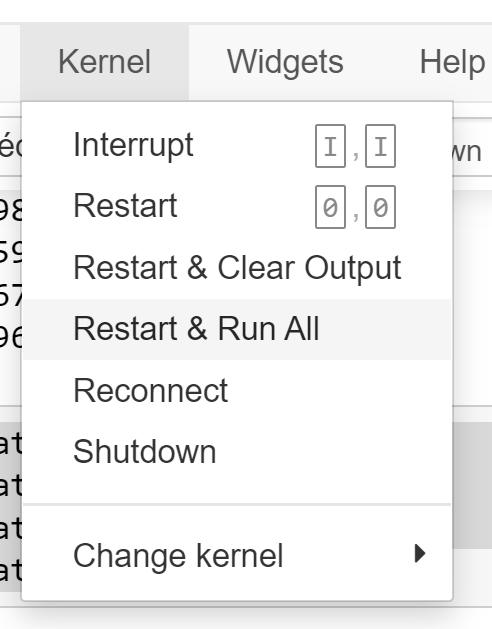
<br>

more details avaiable on:<br>
https://toptechboy.com/9-axis-imu-lesson-19-vpython-visualization-of-pitch-and-yaw/

In [ ]:
%matplotlib notebook

In [144]:
# scene.range = 5
# scene.axis = vector(1, -1, -1)
# scene.camera.axis = vector(1, 1, 1)
scene.forward = vector(.5, -1, -1)
scene.background = color.gray(.2)
arrowL = 4
arrowT = .05
ball_r = 3
point_ball_r = ball_r/30

show_path = True

mySphere = sphere(radius=ball_r, color=vector(1,1,0), opacity=.5)
xArrow = arrow(axis=vector(1, 0, 0), color=vector(1, 1, 1), length=arrowL, shaftwidth=arrowT)
yArrow = arrow(axis=vector(0, 1, 0), color=vector(1, 1, 1), length=arrowL, shaftwidth=arrowT)
zArrow = arrow(axis=vector(0, 0, 1), color=vector(1, 1, 1), length=arrowL, shaftwidth=arrowT)

frontArrow = arrow(axis=vector(1, 0, 0), color=vector(1, 0.5, 0.5), length=arrowL*2, shaftwidth=arrowT)
upArrow = arrow(axis=vector(0, 1, 0), color=vector(0.5, 1, 0.5), length=arrowL*1.2, shaftwidth=arrowT)
sideArrow = arrow(axis=vector(0, 0, 1), color=vector(0.5, 0.5, 1), length=arrowL*1.2, shaftwidth=arrowT)

f_ball_point = sphere(make_trail=show_path, trail_color=frontArrow.color, radius=point_ball_r,
                      color=frontArrow.color, pos=frontArrow.axis, opacity=.5)
u_ball_point = sphere(make_trail=show_path, trail_color=upArrow.color, radius=point_ball_r,
                      color=upArrow.color, pos=upArrow.axis, opacity=.5)
s_ball_point = sphere(make_trail=show_path, trail_color=sideArrow.color, radius=point_ball_r,
                      color=sideArrow.color, pos=sideArrow.axis, opacity=.5)


arduino_board = box(length=2, width=.2, heght=.1, opacity=.8, pos=vector(0, 0, 0))
chip = box(length=.5, width=.05, heght=.05, pos=vector(-.5, .1+.05, 0), color=color.blue)
arduino = compound([arduino_board, chip])



# while True:
for i, w in enumerate(quaternions):
    rate(50)
    
    q0 = quaternions[i][0]
    q1 = quaternions[i][1]
    q2 = quaternions[i][2]
    q3 = quaternions[i][3]
        
    roll = atan2(2*(q0*q1+q2*q3), 1-2*(q1*q1+q2*q2))
    pitch = asin(2*(q0*q2-q3*q1))
    yaw = atan2(2*(q0*q3+q1*q2), 1-2*(q2*q2+q3*q3))
    

    k = vector(cos(yaw)*cos(pitch), sin(pitch), sin(yaw) * cos(pitch))

    y = vector(0, 1, 0)
    s = cross(k, y)
    v = cross(s, k)
    
    v_rotated = v*cos(roll)+cross(k,v)*sin(roll)

    frontArrow.axis = k
    upArrow.axis = v_rotated
    sideArrow.axis = cross(k,v_rotated)
    arduino.axis = k
    arduino.up = v_rotated
    
    frontArrow.length = arrowL * 2
    upArrow.length = arrowL * 1.6
    sideArrow.length = arrowL * 1.2
    f_ball_point.pos = frontArrow.axis
    u_ball_point.pos = upArrow.axis
    s_ball_point.pos = sideArrow.axis


NameError: name 'quaternions' is not defined

### Uncomment to see a simple exemple

In [ ]:
# scene.range = 5
# # scene.axis = vector(1, -1, -1)
# # scene.camera.axis = vector(1, 1, 1)
# scene.forward = vector(.5, -1, -1)
# scene.background = color.gray(.2)
# arrowL = 4
# arrowT = .05
# ball_r = 3
# point_ball_r = ball_r/30


# mySphere = sphere(radius=ball_r, color=vector(1,1,0), opacity=.5)
# xArrow = arrow(axis=vector(1, 0, 0), color=vector(1, 1, 1), length=arrowL, shaftwidth=arrowT)
# yArrow = arrow(axis=vector(0, 1, 0), color=vector(1, 1, 1), length=arrowL, shaftwidth=arrowT)
# zArrow = arrow(axis=vector(0, 0, 1), color=vector(1, 1, 1), length=arrowL, shaftwidth=arrowT)

# frontArrow = arrow(axis=vector(1, 0, 0), color=vector(1, 0.5, 0.5), length=arrowL*2, shaftwidth=arrowT)
# upArrow = arrow(axis=vector(0, 1, 0), color=vector(0.5, 1, 0.5), length=arrowL*1.2, shaftwidth=arrowT)
# sideArrow = arrow(axis=vector(0, 0, 1), color=vector(0.5, 0.5, 1), length=arrowL*1.2, shaftwidth=arrowT)

# f_ball_point = sphere(make_trail=True, trail_color=frontArrow.color, radius=point_ball_r,
#                       color=frontArrow.color, pos=frontArrow.axis, opacity=.5)
# u_ball_point = sphere(make_trail=True, trail_color=upArrow.color, radius=point_ball_r,
#                       color=upArrow.color, pos=upArrow.axis, opacity=.5)
# s_ball_point = sphere(make_trail=True, trail_color=sideArrow.color, radius=point_ball_r,
#                       color=sideArrow.color, pos=sideArrow.axis, opacity=.5)


# arduino_board = box(length=2, width=.2, heght=.1, opacity=.8, pos=vector(0, 0, 0))
# chip = box(length=.5, width=.05, heght=.05, pos=vector(-.5, .1+.05, 0), color=color.blue)
# arduino = compound([arduino_board, chip])



# # while True:
# for i, this_theta in enumerate(theta):
    
#     roll = phi[i]
#     pitch = this_theta
#     yaw = psi[i]
    
#     rate(50)
#     k = vector(cos(yaw)*cos(pitch), sin(pitch), sin(yaw) * cos(pitch))

#     y = vector(0, 1, 0)
#     s = cross(k, y)
#     v = cross(s, k)
    
#     v_rotated = v*cos(roll)+cross(k,v)*sin(roll)

#     frontArrow.axis = k
#     upArrow.axis = v_rotated
#     sideArrow.axis = cross(k,v_rotated)
#     arduino.axis = k
#     arduino.up = v_rotated
    
#     frontArrow.length = arrowL * 2
#     upArrow.length = arrowL * 1.6
#     sideArrow.length = arrowL * 1.2
#     f_ball_point.pos = frontArrow.axis
#     u_ball_point.pos = upArrow.axis
#     s_ball_point.pos = sideArrow.axis

In [ ]:
# scene.range = 5
# scene.forward = vector(.5, -1, -1)
# scene.background = color.gray(.2)
# arrowL = 2
# arrowT = .05
# theta = 45
# theta = np.radians(theta)
# ball_r = 0.05
# mySphere = sphere(radius=1, color=vector(1,1,1), opacity=.5)
# xArrow = arrow(axis=vector(1, 0, 0), color=vector(1, 0, 0), length=arrowL, shaftwidth=arrowT)
# yArrow = arrow(axis=vector(0, 1, 0), color=vector(0, 1, 0), length=arrowL, shaftwidth=arrowT)
# zArrow = arrow(axis=vector(0, 0, 1), color=vector(0, 0, 1), length=arrowL, shaftwidth=arrowT)

# pntArrow = arrow(axis=vector(arrowL*np.cos(theta),arrowL*np.sin(theta),0),
#                  color=vector(1, 1, 1), length=arrowL, shaftwidth=arrowT)
# ball_point = sphere(make_trail=True, radius=ball_r, color=vector(1,1,1), pos=vector(arrowL, 0, 0), opacity=.5)

# cycles = 0
# total_cycles = 10
# while cycles <= total_cycles:
#     # XY rotation
#     for theta in np.linspace(0, 360, 180):
#         rate(100)
#         theta = np.radians(theta)
#         x = arrowL * np.cos(theta)
#         y = arrowL * np.sin(theta)
#         z = 0
#         direction = vector(x, y, z)
#         pntArrow.axis = direction
#         ball_point.trail_color = vector(1, 0, 0)
#         ball_point.pos = direction

#     # XZ rotation
#     for theta in np.linspace(0, 450, 180):
#         rate(100)
#         theta = np.radians(theta)
#         x = arrowL * np.cos(theta)
#         y = 0
#         z = arrowL * np.sin(theta)
#         direction = vector(x, y, z)
#         pntArrow.axis = direction
#         ball_point.pos = direction
#         ball_point.trail_color = vector(0, 0, 1)
#     # ZY rotation
#     for theta in np.linspace(0, 360, 180):
#         rate(100)
#         theta = np.radians(theta)
#         x = 0
#         y = arrowL * np.sin(theta)
#         z =  arrowL * np.cos(theta)
#         direction = vector(x, y, z)
#         pntArrow.axis = direction
#         ball_point.pos = direction
#         ball_point.trail_color = vector(0, 1, 0)
#     # XZ rotation (back in place to restart)
#     for theta in np.linspace(90, 360, 180):
#         rate(100)
#         theta = np.radians(theta)
#         x = arrowL * np.cos(theta)
#         y = 0
#         z = arrowL * np.sin(theta)
#         direction = vector(x, y, z)
#         pntArrow.axis = direction
#         ball_point.pos = direction
#         ball_point.trail_color = vector(0, 0, 1)
        
#         cycles += 1

In [ ]:
%matplotlib inline

# To Do

- [x] Draw vector balls
- [x] calculate Euler's angles
- [x] test different data
- calculate quaternions from raw sensor data

<br>
Sensor<br>

- [x] get angles
- [x] Use roll


You need a magnetometer to calculate the attitude (rotation). Use the attitude to filter out the gravity acceleration from the raw accelerometer values so you're left with linear acceleration. Integrate it twice to get velocity and position and voila! You have a precise position... for a few seconds anyway.

Sensors are noisy and integration converts noise into drift so without corrections your calculated position will be wrong very quickly.
https://en.wikipedia.org/wiki/Dead_reckoning


More details:
- Gyro gives you angular rates (angular velocity) which you have to integrate to get angular position. This introduces drift which you need to correct using the accelerometer and magnetometer.
- Filter the clean but drifting gyro angular position with a noisy but stable angular position built form raw acceleration and magnetometer vector using a kalman or complimentary filter. You should have stable and clean(ish) angular position. Any noise in the magnetometer or linear acceleration will appear as angular position noise.
- Since now you know which way is up (from the stable rotation calculated above), you can remove the gravity acceleration from raw accelerometer data. Any error in the rotation will result in the gravity acceleration polluting the linear acceleration (the system will appear to accelerate in random directions)
- Integrate linear acceleration twice. This results in massive drift due to the accumulated errors above. Depending on your algorithm, calibration method, sensor quality, local magnetic distortion, how close you are to the poles etc - you'll have a stable position for seconds or tens of seconds. For more stability you can filter this position with some absolute value coming from a GPS for example.